## Problem Statement

**Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients.** 

**The goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.**

## PREPARATION

# 1. IMPORTING REQUIERD PACKAGES AND LIBRARIES

In [698]:
# data manipulation library
import numpy as np
import pandas as pd

from scipy import stats

# visualization library
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use("seaborn-muted")

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import LabelEncoder 

from sklearn import metrics 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.exceptions import NotFittedError
from sklearn.exceptions import NotFittedError

import xgboost as xgb

import pickle

*IMPORTING DATASET USING PANDAS DATAFRAME*

In [699]:
# Importing datalt\\
CCD=pd.read_csv('UCI_Credit_Card.csv')

# 2. Data Overview & Data Description

In [700]:
#Checking First Five rows
CCD.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [701]:
# This will view the name of all columns
CCD.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [702]:
CCDM = CCD.copy()
CCDM.rename(columns={"default.payment.next.month": "DEFAULT"}, inplace=True)
CCDM.drop('ID',axis=1,inplace=True)

In [703]:
CCDM.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Understanding The Dataset**

**#Attribute Enlightenment**
<br>
**X24: **default payment** 
<br>
   -(True = 1, False = 0), as the response variable. This study reviewed the literature and used the following 23         variables as explanatory variables:
<br>
**X1: Amount of the given credit(LIMIT_BAL) (dollar)**: 
<br>
   -it includes both the individual consumer credit and his/her family (supplementary) credit.
<br>
**X2: Gender** 
<br>
   -(1 = Male; 2 = Female).
<br>
**X3: Education** (1 = graduate school; 2 = university; 3 = high school; 4 = others).
<br>
**X4: Marital status** (1 = married; 2 = single; 3 = others).
<br>
**X5: Age** (year)
<br>
**X6 - X11:(PAY)**
<br>
 +  -History of past payment. We tracked the past monthly payment records (from April to September,2005)as follows<br>
  > X6 = the repayment status in September, 2005;<br>
  >  -X7 = the repayment status in August, 2005;<br>
  > . <br>
  >  .<br>
  >  .<br>
  >  -X11 = the repayment status in April, 2005. <br>
 + -The measurement scale for the repayment status is: <br>
  >   -1 = pay duly; 1 = payment delay for one month; <br>
  >    2 = payment delay for two months;<br>
  >    .<br>
  >   .<br>
  >   .<br>
  >  8 = payment delay for eight months; <br>
  >  9 = payment delay for nine months and above.<br>


**X12-X17:(BILL_AMT)** <br>
  + Amount of bill statement (NT dollar).<br>
  
  > X12 = amount of bill statement in September, 2005; <br>
  > X13 = amount of bill statement in August, 2005;<br>
   > .<br>
   > .<br>
   > . <br>
   > X17 = amount of bill statement in April, 2005.<br>
   
**X18-X23:(PAY_AMT)** <br>
 + Amount of previous payment (NT dollar). <br>
  >  X18 = amount paid in September, 2005; <br>
   > X19 = amount paid in August, 2005;<br>
   > .<br>
   > .<br>
   > .<br>
   > X23 = amount paid in April, 2005.<br>


In [704]:
#couting categorical values of target variable
CCD['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [705]:
#Shape of the Dataset
CCD.shape

(30000, 25)

**We have total 25 columns with 30,000 entries or tuples.**

# 3. Data Cleaning

### I. CHECK_NULL_VALUES

In [706]:
#checking Missing Values
print(f'Total Number of Null Values: {CCD.isna().sum().sum()}')

Total Number of Null Values: 0


### II. CHECK_DUPLICATES

In [707]:
CCD.duplicated().sum()

0

### III. CHECK_DATA_TYPE_OF_EACH_COLUMN

In [708]:
CCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### IV. RENAME AND DROP UNNECESSARY COLUMNS

In [709]:
# Simplifying column names and bringing consistency
CCD.rename(
    columns={"PAY_0": "PAY_1", "default.payment.next.month": "DEFAULT"}, 
    inplace=True
)

In [710]:
#Categorical_Data
CCD['SEX']=CCD['SEX'].map({1 : 'MALE' , 2 : 'FEMALE'})
CCD['SEX'].value_counts()

FEMALE    18112
MALE      11888
Name: SEX, dtype: int64

In [711]:
# 1=married, 2=single, 3=others

CCD['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [712]:
# here, we have some 0 which are not detemine so adding that values in others category.

#CCD.loc[CCD['MARRIAGE'] == 0 , 'MARRIAGE']=3
CCD['MARRIAGE']=CCD['MARRIAGE'].map({0:'unknown',1:'Married', 2:'Single', 3:'Divorce'})
CCD['MARRIAGE'].value_counts()

Single     15964
Married    13659
Divorce      323
unknown       54
Name: MARRIAGE, dtype: int64

In [713]:

# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

CCD['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [714]:
# here, merge 0,4,5,6 category as 4 category which is others.

fil = (CCD['EDUCATION'] == 5) | (CCD['EDUCATION'] == 6) | (CCD['EDUCATION'] == 0)

CCD.loc[fil , 'EDUCATION'] = 4
CCD['EDUCATION'] = CCD['EDUCATION'].map({1:'graduate school', 2:'university', 3:'high school', 4:'others'})
CCD['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

In [715]:
#Dropping 'ID' from dataset, which is not important for prediction.

CCD.drop('ID',axis=1,inplace=True)

In [716]:
# Changing the name for better readability
CCD.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
CCD.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
CCD.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

### V. CHECK_STATISTICS

In [717]:
# Checking the range of the numerical entries
# the transpose view makes it more reader-friendly
CCD.describe(
    include="all"
).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,30000,2,FEMALE,18112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,30000,4,university,14030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,30000,4,Single,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,30000.0,NaN,NaN,NaN,35.4855,9.217904,21.0,28.0,34.0,41.0,79.0
PAY_SEPT,30000.0,NaN,NaN,NaN,-0.0167,1.123802,-2.0,-1.0,0.0,0.0,8.0
PAY_AUG,30000.0,NaN,NaN,NaN,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_JUL,30000.0,NaN,NaN,NaN,-0.1662,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_JUN,30000.0,NaN,NaN,NaN,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_MAY,30000.0,NaN,NaN,NaN,-0.2662,1.133187,-2.0,-1.0,0.0,0.0,8.0


In [718]:
CCD.nunique()

LIMIT_BAL           81
SEX                  2
EDUCATION            4
MARRIAGE             4
AGE                 56
PAY_SEPT            11
PAY_AUG             11
PAY_JUL             11
PAY_JUN             11
PAY_MAY             10
PAY_APR             10
BILL_AMT_SEPT    22723
BILL_AMT_AUG     22346
BILL_AMT_JUL     22026
BILL_AMT_JUN     21548
BILL_AMT_MAY     21010
BILL_AMT_APR     20604
PAY_AMT_SEPT      7943
PAY_AMT_AUG       7899
PAY_AMT_JUL       7518
PAY_AMT_JUN       6937
PAY_AMT_MAY       6897
PAY_AMT_APR       6939
DEFAULT              2
dtype: int64

# 4. Exploratory Data Analysis

*First, we will look at the distribution of the target variable (Default). Then, we'll move on to the features, looking at their distributions, their relationships to the target, and, in some cases, the relationships among some of them.*

### DEFAULT %

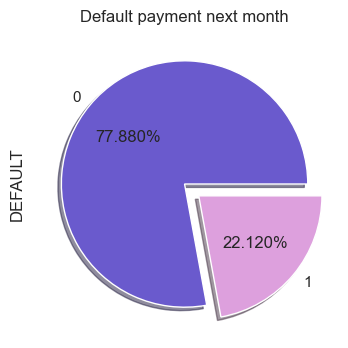

In [719]:
plt.figure(figsize = [10, 4], clear = True, facecolor = "#FFFFFF")
plt.title("Default payment next month")
CCD["DEFAULT"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.3f%%',colors = ['Slateblue','PLUM'], shadow = True);

Conclusion: in our dataset 77.88% are not Default and 22.120% are Default

## DEMOGRAPHIC FEATURE

### Feature : Sex

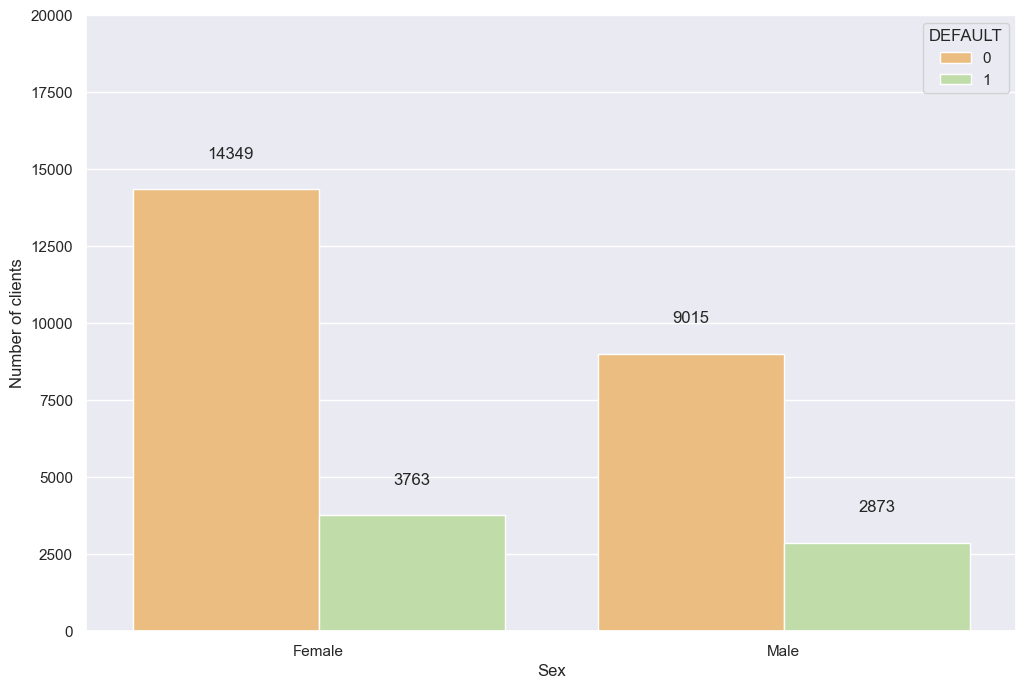

In [720]:
sns.set(font_scale=1)
plt.figure(figsize=(12,8))
ax = sns.countplot(x='SEX' ,hue="DEFAULT", data=CCD,  palette = 'Spectral')
plt.xlabel('Sex')
plt.ylabel('Number of clients')
plt.ylim(0,20000)
plt.xticks([0,1], ['Female', 'Male'])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
    #print(p.get_height())
    #print(p.get_x()+0.16, p.get_height()+1000)
plt.show()

Conclusion: in our dataset, female 

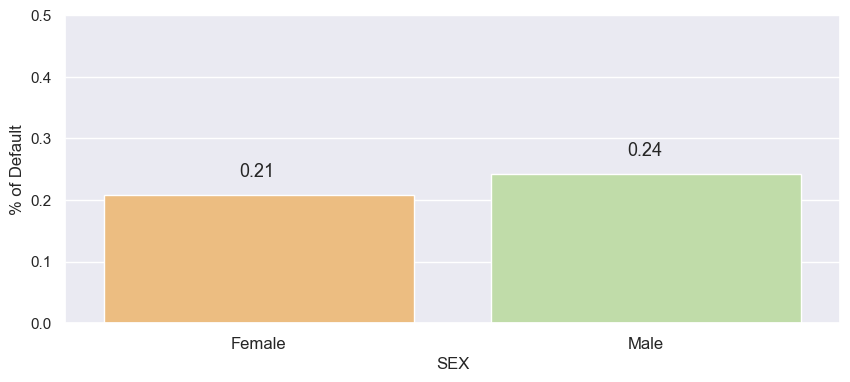

In [721]:
sns.set(font_scale=1)
plt.figure(figsize=(10,4))
ax = sns.barplot(x="SEX", y="DEFAULT", data=CCD,palette = 'Spectral' ,ci=None)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Female', 'Male'], fontsize = 12)

for V in ax.patches:
    ax.annotate("%.2f" %(V.get_height()), (V.get_x()+0.35, V.get_height()+0.03),fontsize=13)
plt.show()

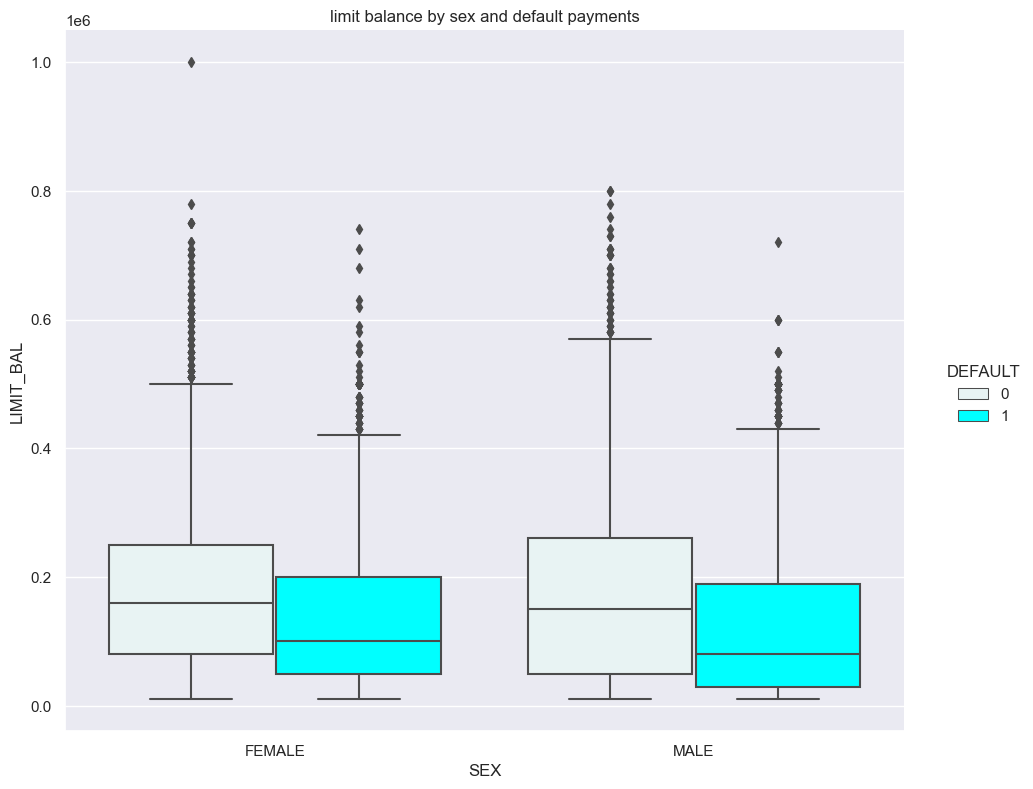

In [722]:
sns.catplot(x = "SEX",
            y = "LIMIT_BAL",
            kind = "box",
            hue = "DEFAULT",
            color = '#00FFFF',
            data = CCD, saturation = 1, height = 8, aspect = 1.2,
            margin_titles = True).set(title = "limit balance by sex and default payments");

**In our dataset, there are more FEMALE than MALE, and it appears that MALE have a slightly greater default probability. Later, we'll compare men and FEMALE with the same level of education and marital status in an effort to confirm it.**

### Feature : Education

As we can see from the descriptive statistics (CCD.describe), the feature "EDUCATION" has a minimum value of 0, which is different from the potential values listed in the original dataset metadata. The supplementary information places 4 values in the same category ('others'): 0, 4, 5, and 6.

We don't have a specified label for the number '0,' and the values '5' and '6' are also initially marked as 'unknown. Perhaps we can group them all into one category. But first, we'll leave it as is for the time being and count the number of samples in each group and determine what percentage of them are Default.

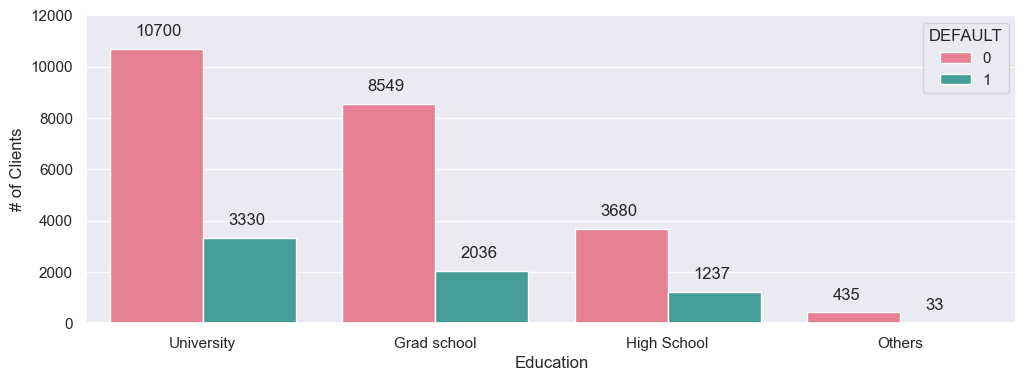

In [723]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
ax = sns.countplot(data=CCD , x='EDUCATION', hue="DEFAULT",palette = 'husl' )
plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['University','Grad school', 'High School','Others'])
for V in ax.patches:
    ax.annotate((V.get_height()), (V.get_x()+0.11, V.get_height()+500))

plt.show()

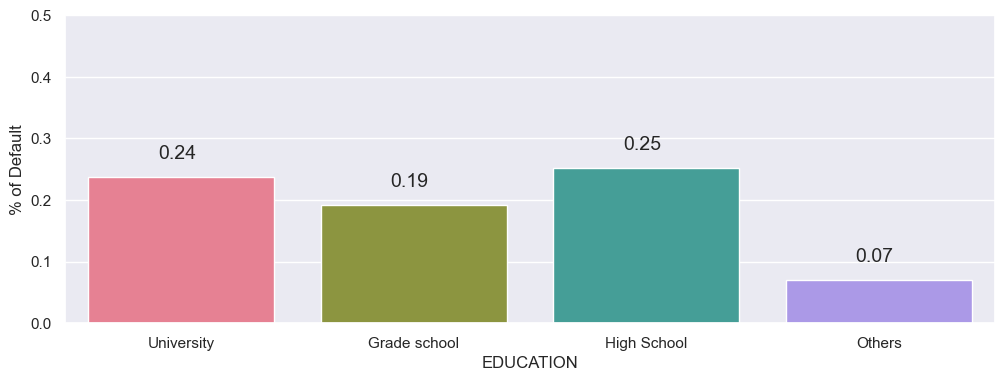

In [724]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=CCD , x='EDUCATION', y="DEFAULT",palette = 'husl' , ci=None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['University', 'Grade school', 'High School','Others'],fontsize=11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03), fontsize=14)

plt.show()

**In our dataset, "University" is the most common educational level, followed by "Grade School," "High School," "Unknown," and "Others."**

**When only the first three levels are taken into account, it appears that a greater education correlates with a decreased risk of default. However, the likelihood of "Unknown" and "Others" (which we would assume denotes a level below high school) is substantially lower.**

### Feature Age

In [725]:
CCD['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [726]:
CCD['AGE']=CCD['AGE'].astype('int')

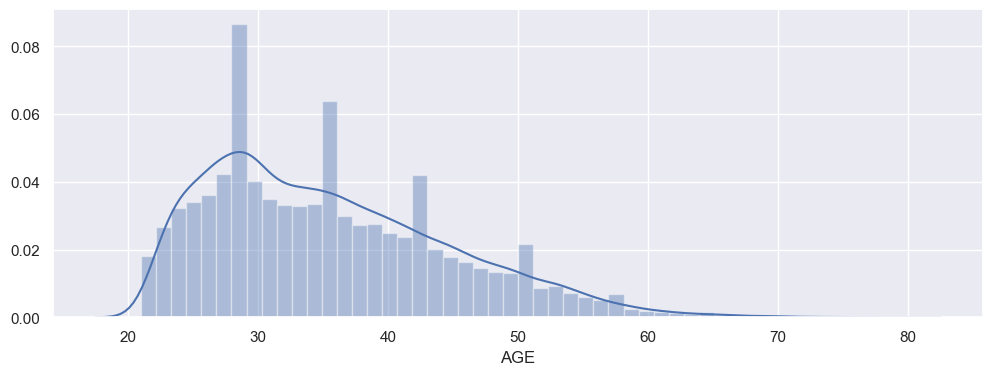

In [727]:
plt.figure(figsize=(12,4))

sns.distplot(CCD['AGE'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

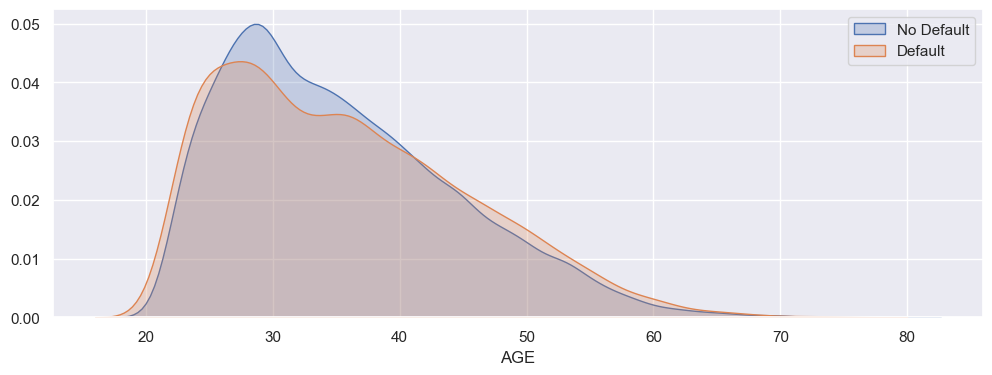

In [728]:
plt.figure(figsize=(12,4))

sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

**Most of the CREDITCARD HOLDER in our sample are between the ages of 25 and 40. Additionally, there is a perception that around that age, the likelihood of default is slightly reduced, but we could break our dataset into age groups and look at the proportion of default in each to be certain.**

In [729]:
CCD['AgeNYX'] = pd.cut(CCD['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(CCD['AgeNYX'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeNYX, dtype: int64


In [730]:
CCD['DEFAULT'].groupby(CCD['AgeNYX']).value_counts(normalize = True)

AgeNYX    DEFAULT
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: DEFAULT, dtype: float64

<AxesSubplot:xlabel='index', ylabel='AgeNYX'>

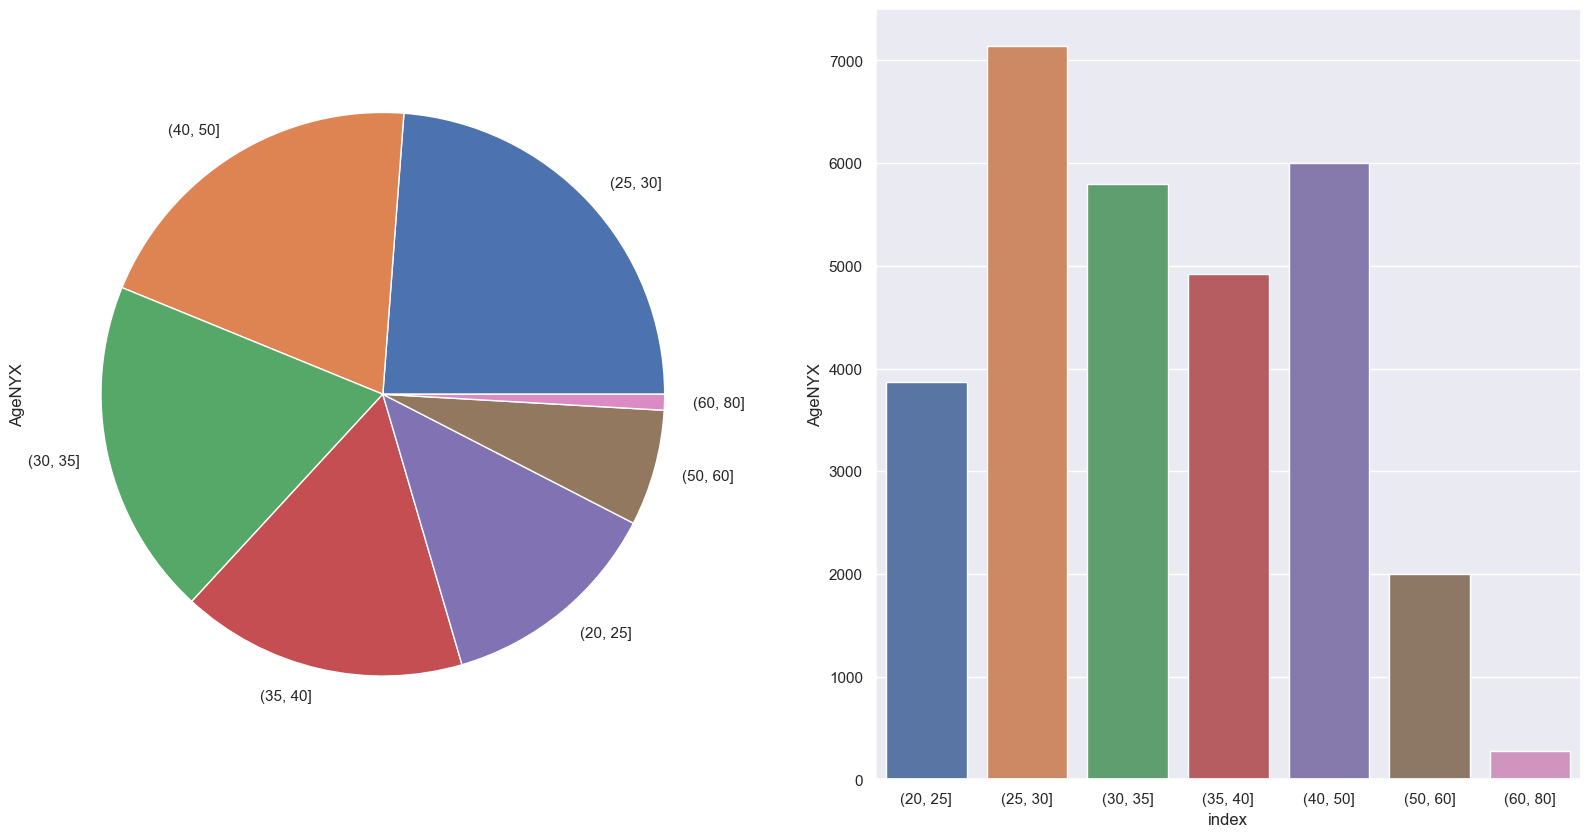

In [731]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_CCD=CCD['AgeNYX'].value_counts().reset_index()
CCD['AgeNYX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AgeNYX',data=Day_CCD,ax = axes[1],orient='v')

Conclusion :in our data set most of the CREDITCARD HOLDER in our sample are between the ages of (25 ,30). and less number of CREDITCARD HOLDER in our sample are between the ages of (60 ,80)

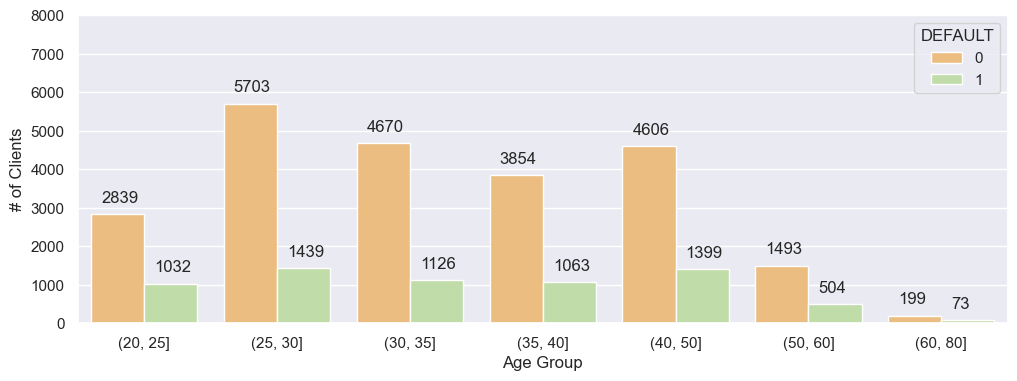

In [732]:
plt.figure(figsize=(12,4))

CCD['AgeNYX'] = CCD['AgeNYX'].astype('str')
AgeNYX_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = CCD, x = 'AgeNYX', hue="DEFAULT", palette = 'Spectral', order = AgeNYX_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

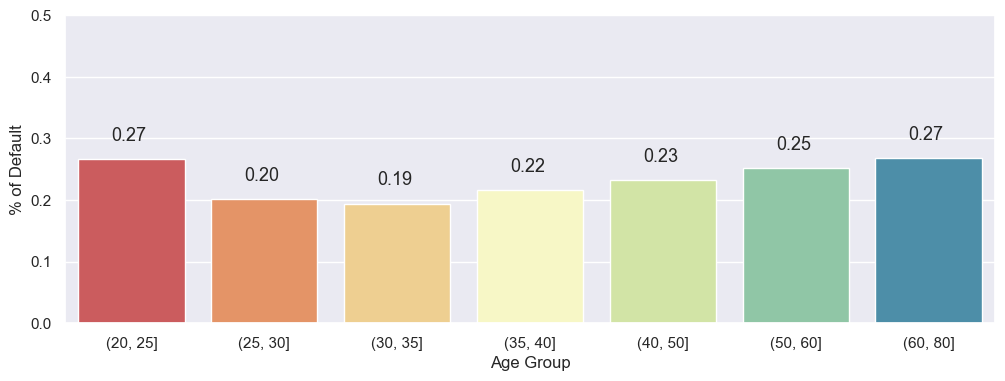

In [733]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeNYX", y = "DEFAULT", data = CCD, palette = 'Spectral', ci = None, order = AgeNYX_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

**As expected, the lowest chances of default are registered around 30-35 years old, while the highest occur at the extremes (20-25 and 60+).**

### Feature Marital Status

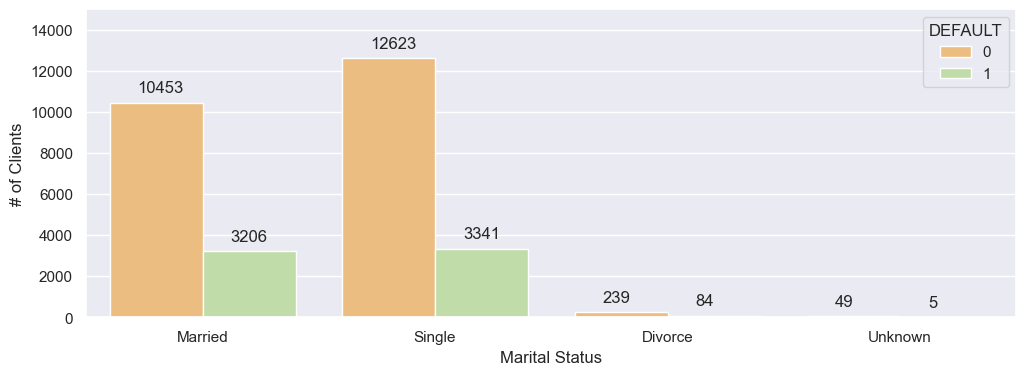

In [734]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = CCD, x = 'MARRIAGE', hue="DEFAULT", palette = 'Spectral')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Married', 'Single', 'Divorce','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

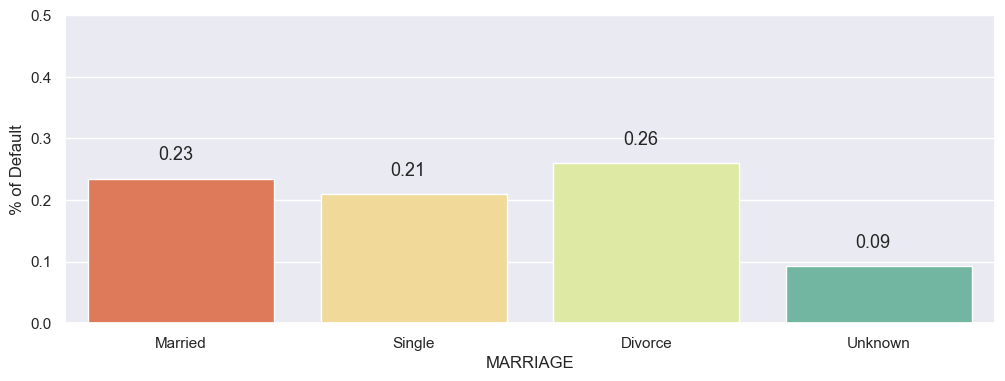

In [735]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "DEFAULT", data = CCD, palette = 'Spectral', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],[ 'Married', 'Single', 'Divorce','Unknown',], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

**As would be assumed, the majority of persons fall into the "Married" or "Single" categories.**

**Once more, the likelihood of default is lower for the 'Unknown' category. Among the remaining group, those who are unmarried have a somewhat reduced likelihood of defaulting, whereas those who have had a divorce have a higher likelihood.**

### Feature : Sex -->> Education/Marital_Status

In [736]:
CCD.groupby(by=['MARRIAGE', 'SEX'])['DEFAULT'].value_counts(normalize = True)

MARRIAGE  SEX     DEFAULT
Divorce   FEMALE  0          0.770833
                  1          0.229167
          MALE    0          0.694656
                  1          0.305344
Married   FEMALE  0          0.780375
                  1          0.219625
          MALE    0          0.740655
                  1          0.259345
Single    FEMALE  0          0.802784
                  1          0.197216
          MALE    0          0.773386
                  1          0.226614
unknown   FEMALE  0          0.925000
                  1          0.075000
          MALE    0          0.857143
                  1          0.142857
Name: DEFAULT, dtype: float64

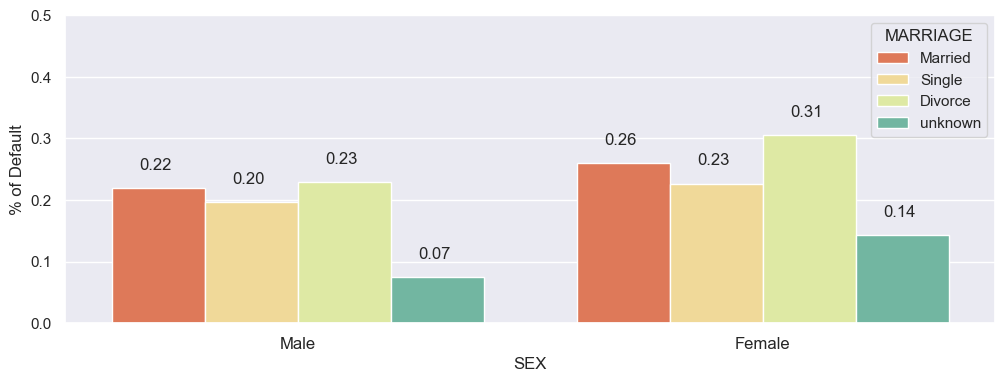

In [737]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "DEFAULT", hue = "MARRIAGE", data = CCD, palette = 'Spectral', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [738]:
CCD.groupby(by=['EDUCATION', 'SEX'])['DEFAULT'].value_counts(normalize = True)

EDUCATION        SEX     DEFAULT
graduate school  FEMALE  0          0.818649
                         1          0.181351
                 MALE    0          0.791915
                         1          0.208085
high school      FEMALE  0          0.763580
                         1          0.236420
                 MALE    0          0.726131
                         1          0.273869
others           FEMALE  0          0.936242
                         1          0.063758
                 MALE    0          0.917647
                         1          0.082353
university       FEMALE  0          0.777957
                         1          0.222043
                 MALE    0          0.737998
                         1          0.262002
Name: DEFAULT, dtype: float64

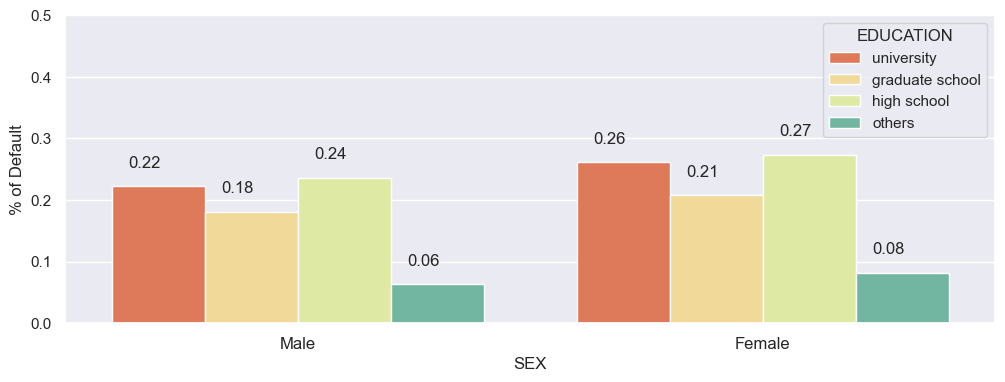

In [739]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "DEFAULT", hue = "EDUCATION", data = CCD, palette = 'Spectral', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

### Feature : Limit Balance (GIVEN_CREDIT)

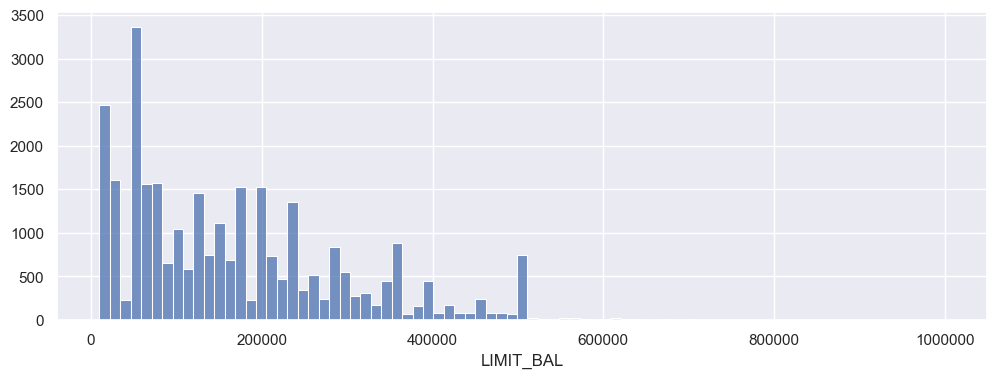

In [740]:
plt.figure(figsize=(12,4))

sns.histplot(CCD['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

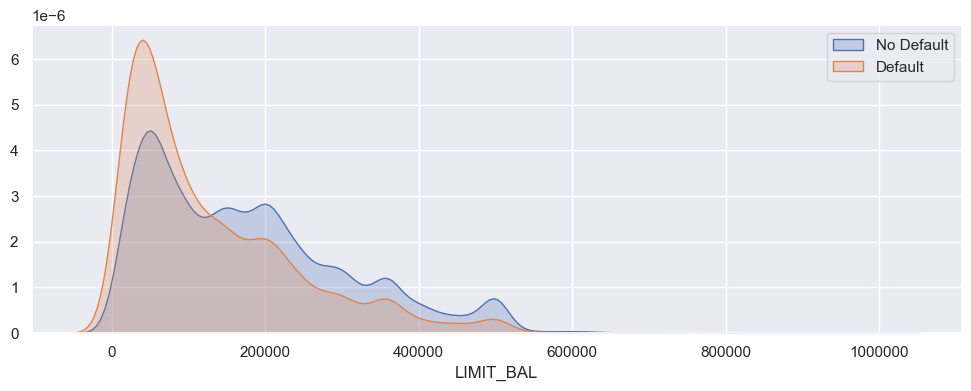

In [741]:
plt.figure(figsize=(12,4))

sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True,palette='husl')
sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True,palette='husl')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.legend()
plt.show()

**Observation**:

The majority of consumers have credit limits of 200k or less. Additionally, it appears that the default rate of clients will be higher in that area. To get a clear view, we'll divide it into bins.

### Feature : Limit Balance (GIVEN_CREDIT)-->>(SEX+EDUCATION+Marital_Status)

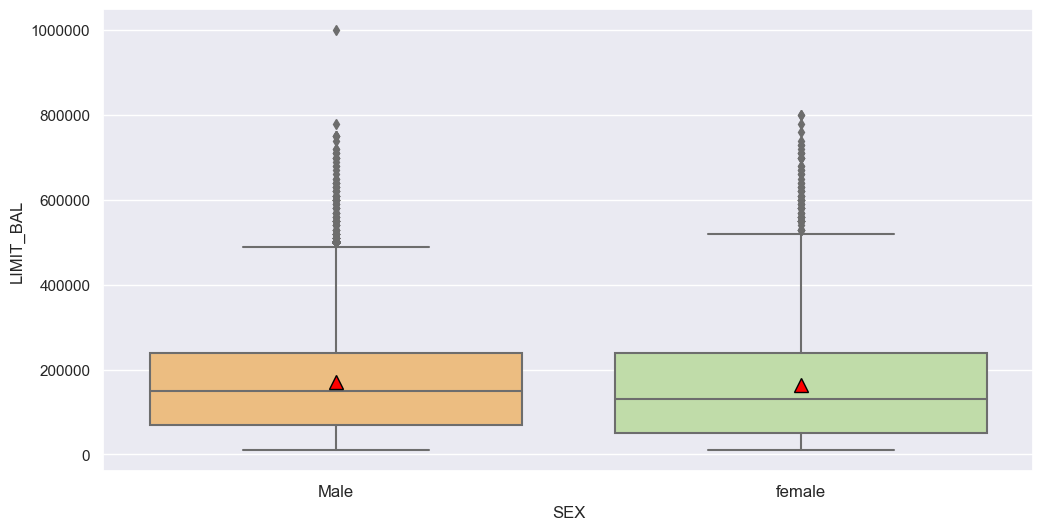

In [742]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.boxplot(x="SEX", y="LIMIT_BAL",data=CCD, palette = 'Spectral', showmeans=True, 
           meanprops={"markerfacecolor":"red", "markeredgecolor":"black","markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0,1],['Male','female'], fontsize = 12)
plt.show()

**seaborn boxplot** : (categorical destribution plots) **median**, **bottom quartile**(25th percentile) , **top quartile**(25th percentile) (interquartile range IQR) and **whiskers**(1.5*IQR)


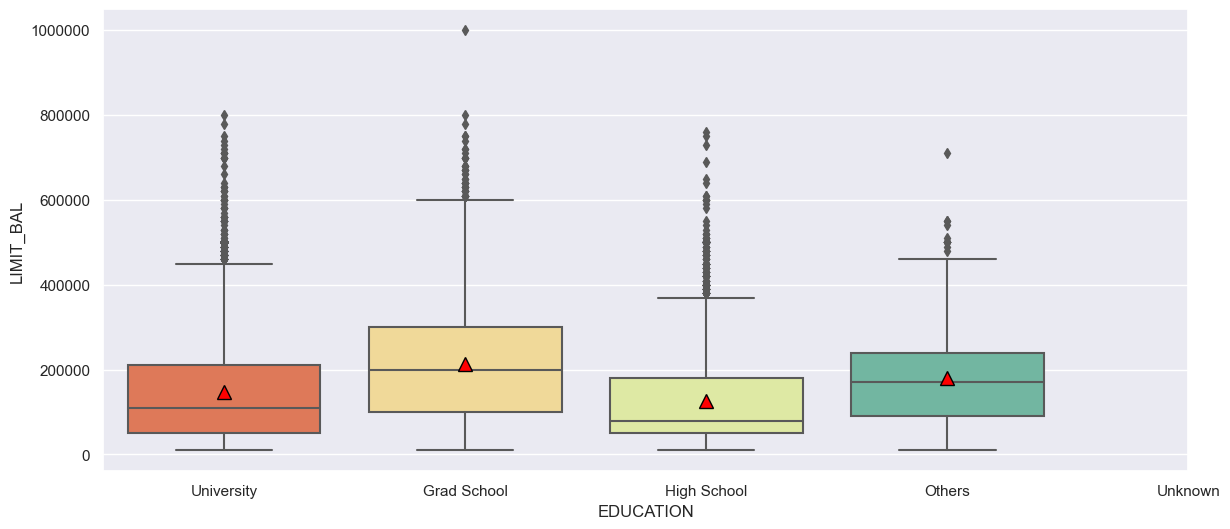

In [743]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1)
sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = CCD, palette = 'Spectral', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') 
plt.xticks([0,1,2,3,4],['University','Grad School','High School','Others','Unknown'], fontsize = 11)

plt.show()

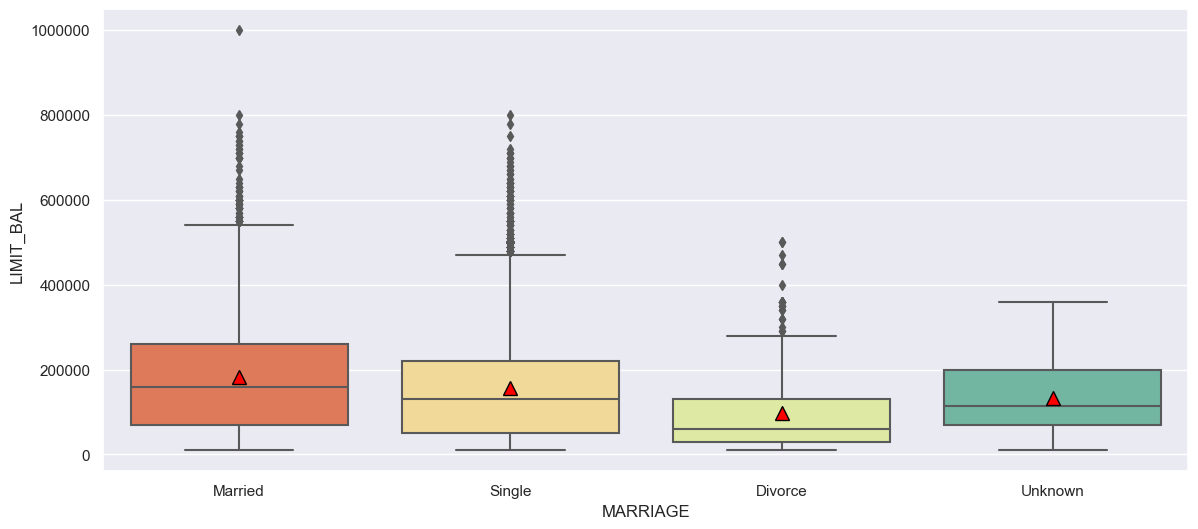

In [744]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1)
sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = CCD, palette = 'Spectral', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')   
plt.xticks([0,1,2,3],['Married', 'Single', 'Divorce','Unknown'], fontsize = 11)

plt.show()

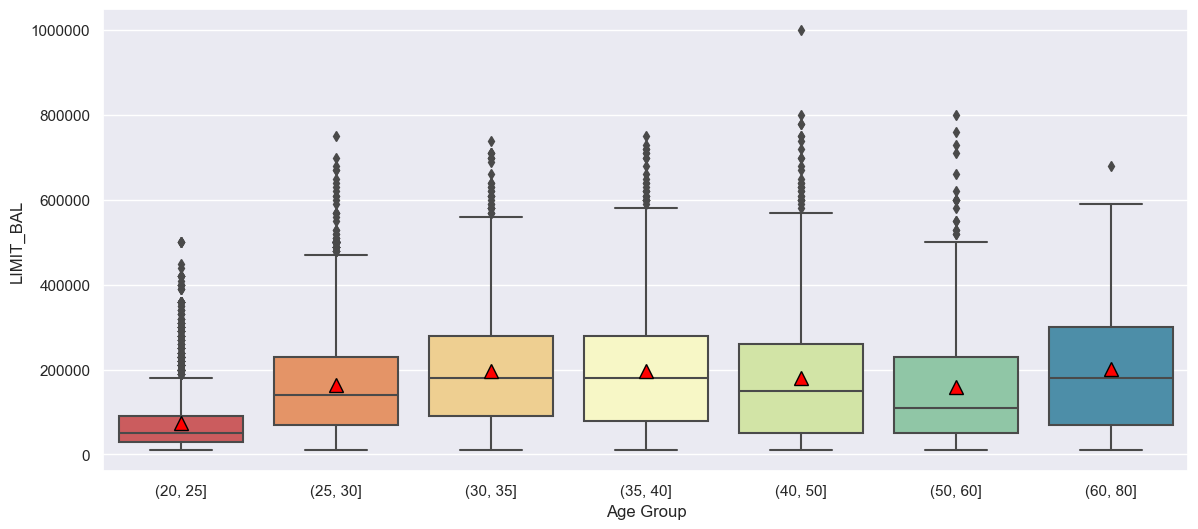

In [745]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1)
sns.boxplot(x = "AgeNYX", y = "LIMIT_BAL",data = CCD, palette = 'Spectral', order = AgeNYX_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize= 12)

plt.show()

**we could analyze the relationship the credit limit and the combination of two demographic features**

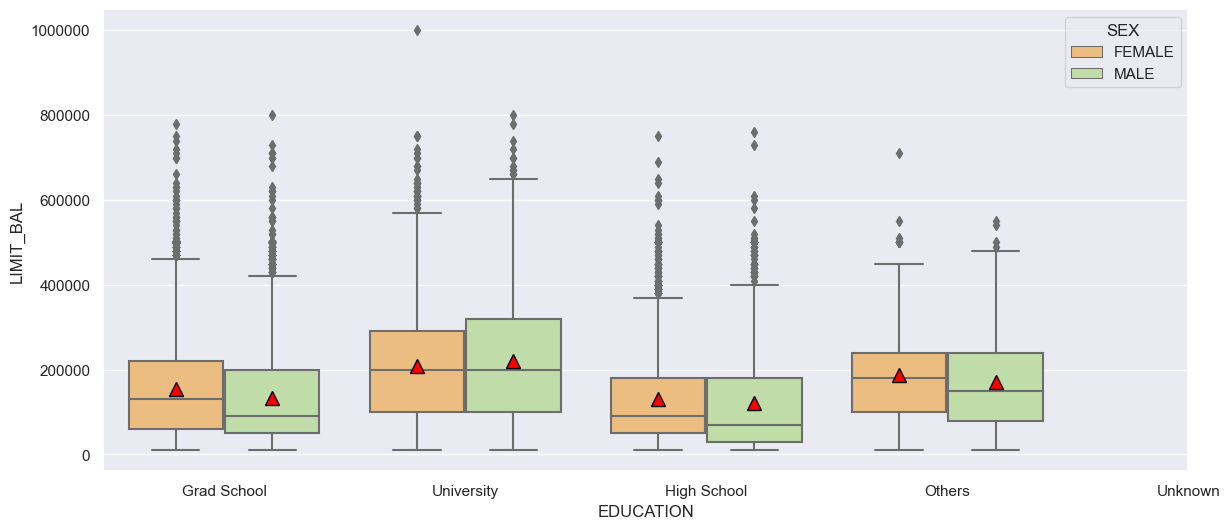

In [746]:
sns.set(font_scale=1)
plt.figure(figsize=(14,6))
sns.boxplot(x="EDUCATION" , y="LIMIT_BAL", hue='SEX',data=CCD, palette = 'Spectral', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

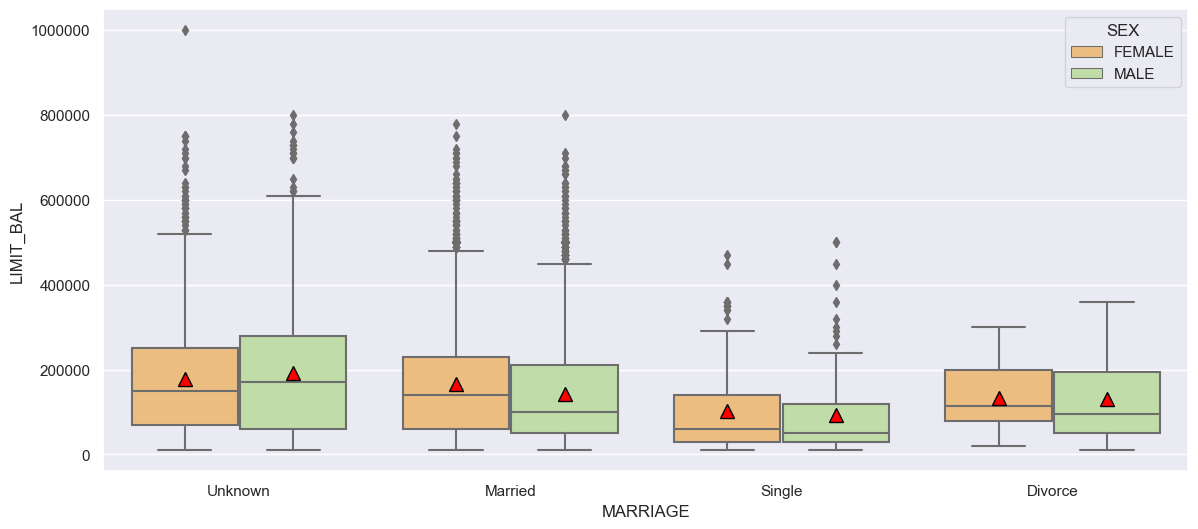

In [747]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1)
sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = CCD, palette = 'Spectral', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')  
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

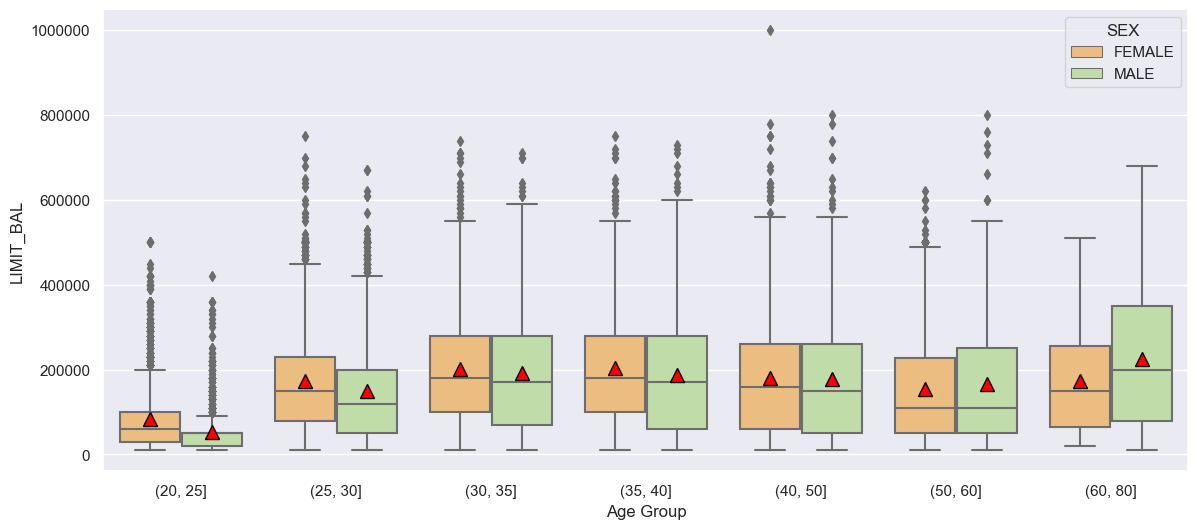

In [748]:
sns.set(font_scale=1)
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeNYX", y = "LIMIT_BAL", hue = 'SEX', data = CCD, palette = 'Spectral', order = AgeNYX_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize= 12)

plt.show()

**we saw earlier that the average given credit for women was slightly higher than for men. that still holds up for several combinations
of categories, except among customers that(have a grad school diploma / are married / are 50+ years old)**


### Feature : repayment status (PAY_X)

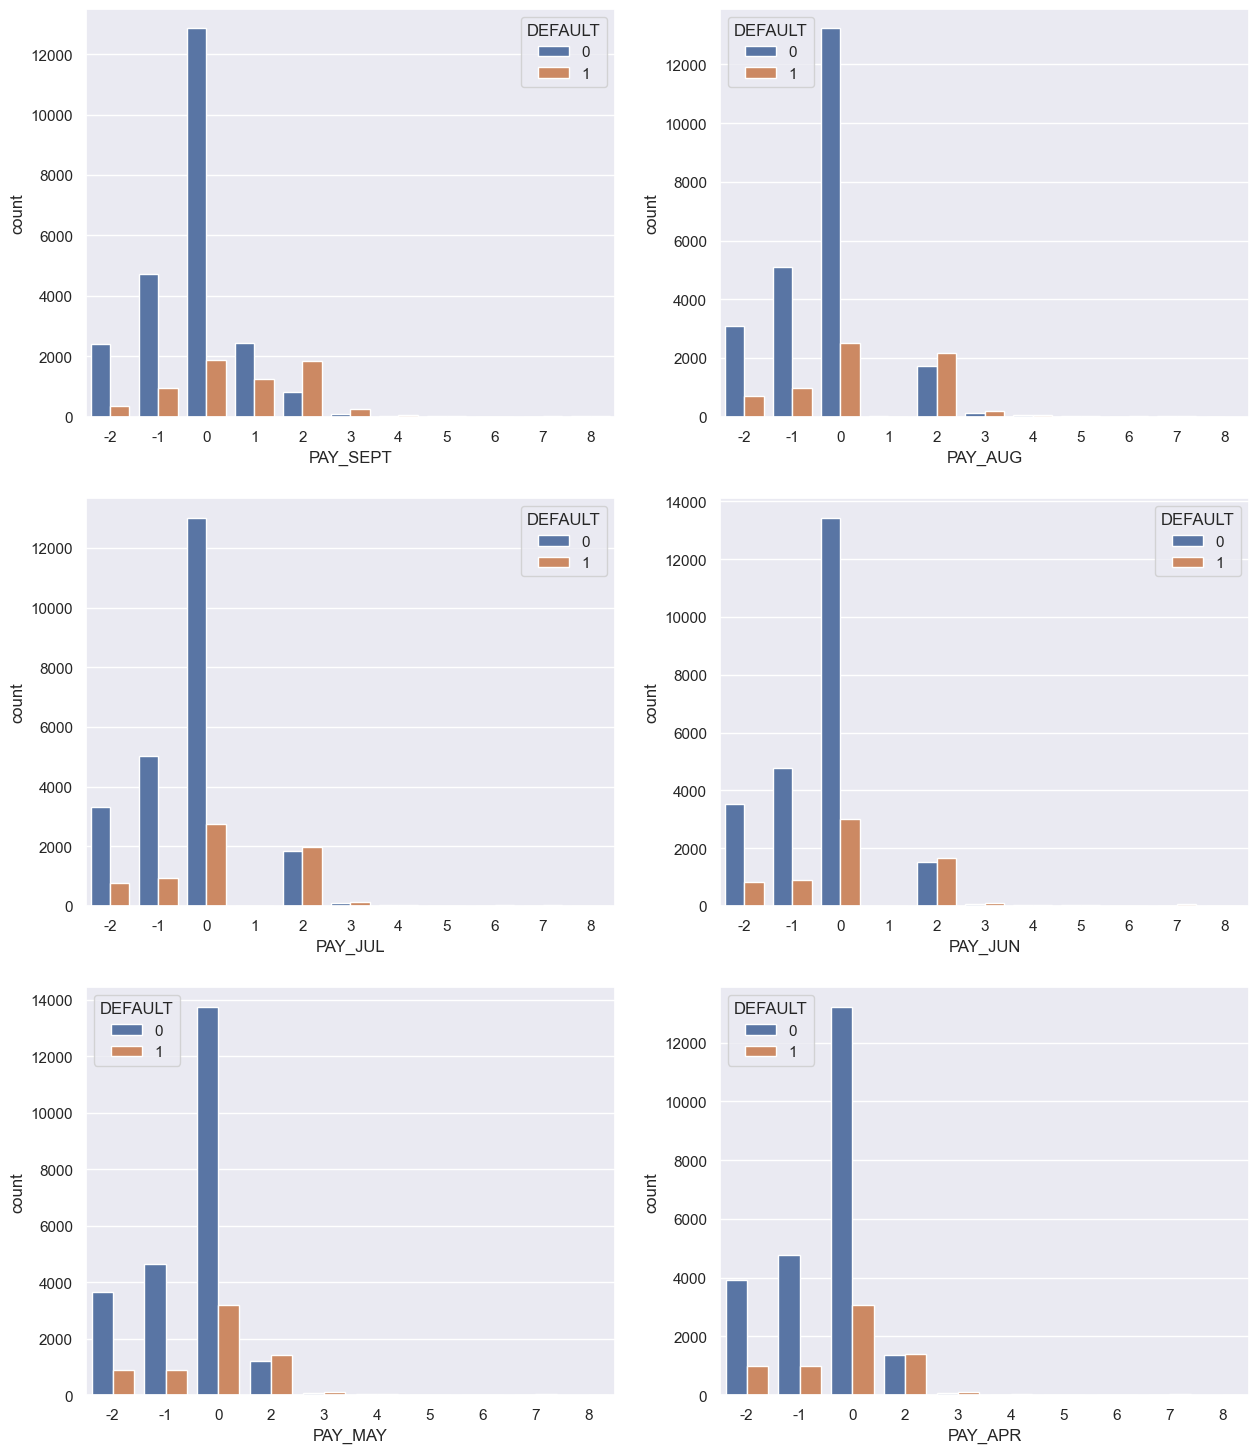

In [749]:

# countplot for all past payments

CCD_PAY_X = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

plt.figure(figsize=(15,18))
for i in range(len(CCD_PAY_X)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=CCD_PAY_X[i],hue='DEFAULT',data=CCD)

**observation :** 
Most customers are duly paying their credit card bills. And it's pretty clear that their likelihood of default are much lower than the rest.we'll be following the same approach used to analyze 'Age' and 'Limit_Bal' , showing destribution and density , than dividing data inbins to get a clear
percentage of default for each group

### Feature : Amount of Bill Statement (BILL_AMT_X)

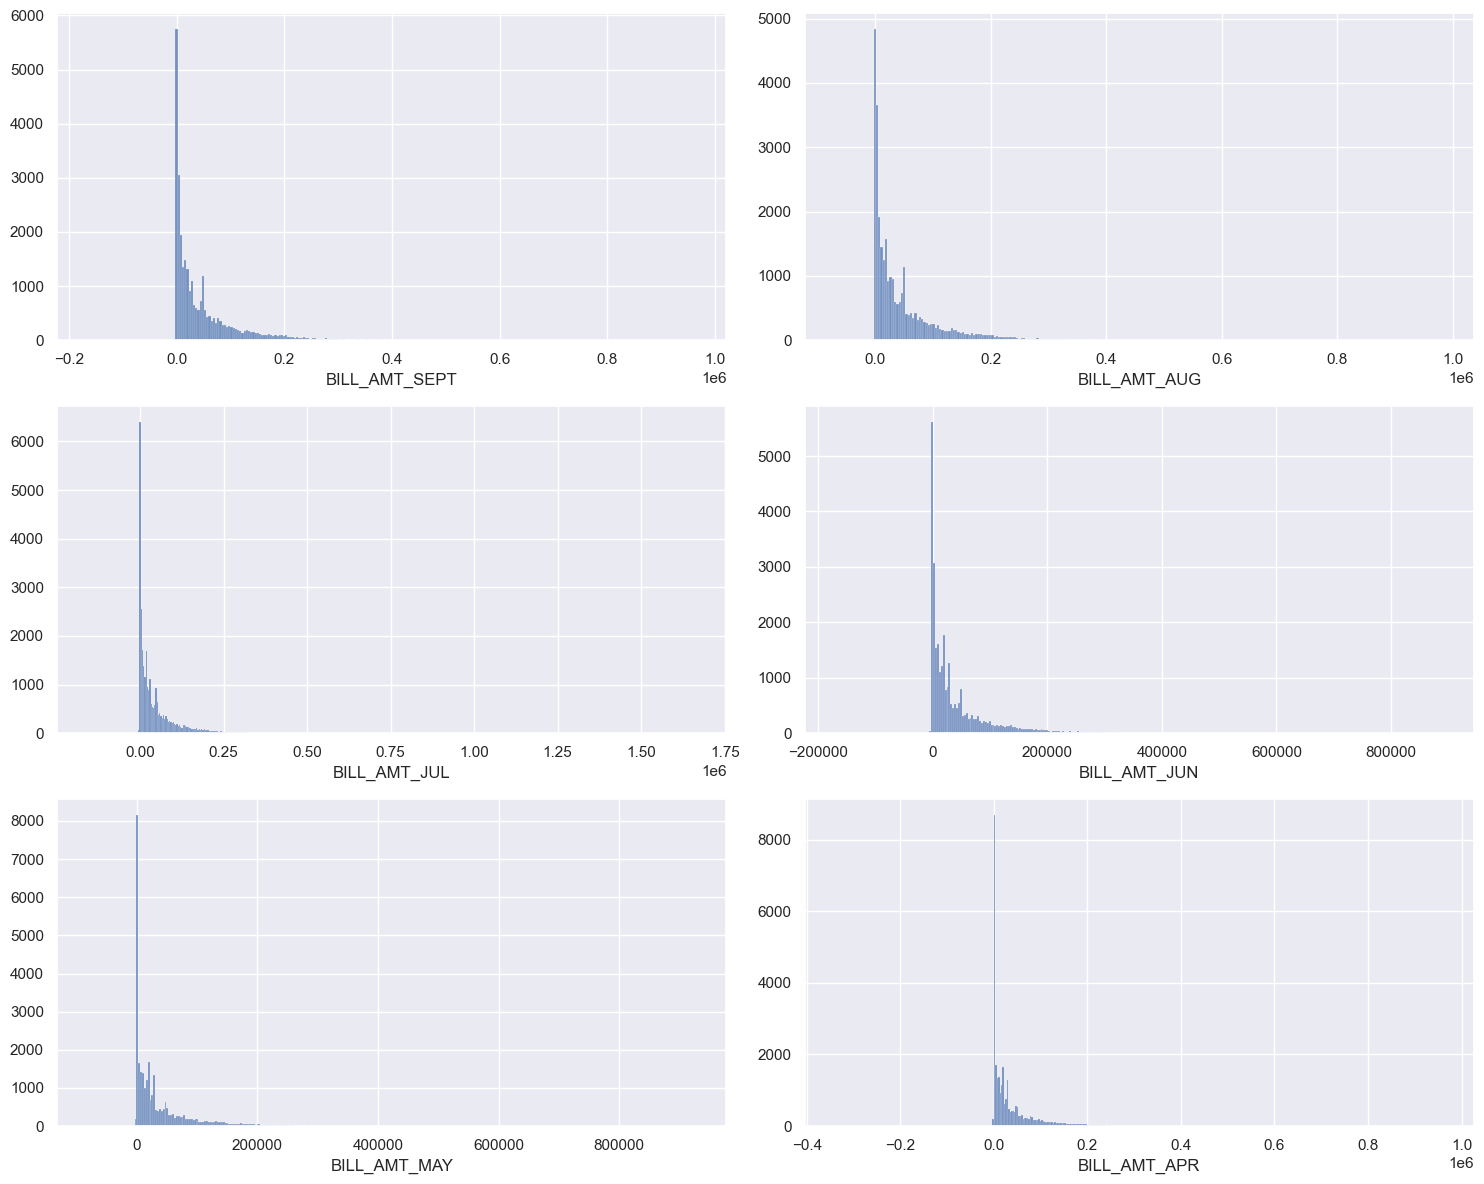

In [750]:
sns.set(font_scale=1)

CCD_BILL_AMT = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
plt.figure(figsize=(15,12))

for i,col in enumerate(CCD_BILL_AMT):
    plt.subplot(3,2,i+1)
    sns.histplot(CCD.loc[:,col])
    plt.ticklabel_format(style='sci', axis='x')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

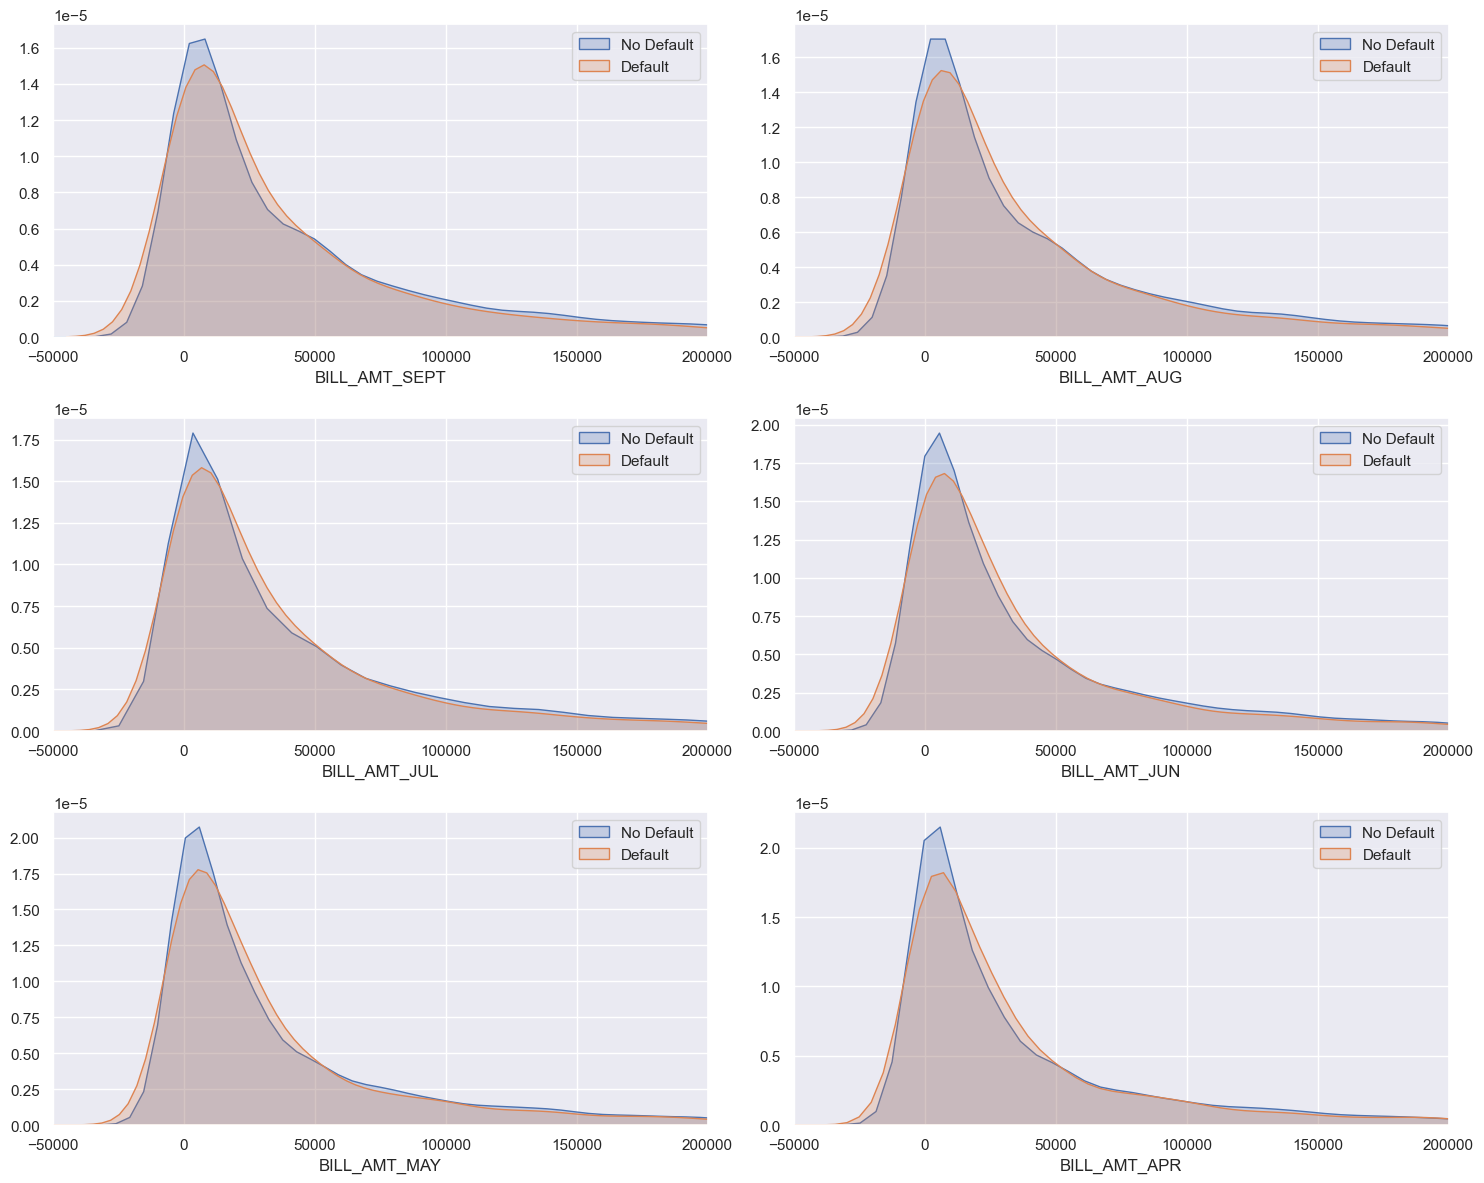

In [751]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(CCD_BILL_AMT):
    plt.subplot(3,2,i+1)
    sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 0), col], label = 'No Default', shade=True)
    sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

In [752]:
CCD['BILL_AMT_SEPT_NYX'] = CCD['BILL_AMT_SEPT'].copy()
CCD['BILL_AMT_AUG_NYX'] = CCD['BILL_AMT_AUG'].copy()
CCD['BILL_AMT_JUL_NYX'] = CCD['BILL_AMT_JUL'].copy()
CCD['BILL_AMT_JUN_NYX'] = CCD['BILL_AMT_JUN'].copy()
CCD['BILL_AMT_MAY_NYX'] = CCD['BILL_AMT_MAY'].copy()
CCD['BILL_AMT_APR_NYX'] = CCD['BILL_AMT_APR'].copy()

In [753]:
CCD_BILL_AMT_NYX = ['BILL_AMT_SEPT_NYX', 'BILL_AMT_AUG_NYX', 'BILL_AMT_JUL_NYX', 'BILL_AMT_JUN_NYX', 'BILL_AMT_MAY_NYX', 'BILL_AMT_APR_NYX']
for i,col in enumerate(CCD_BILL_AMT_NYX):
    CCD[col] = pd.cut(CCD[CCD_BILL_AMT_NYX[i]],[-350000,-1,0,25000, 75000, 200000, 2000000] )

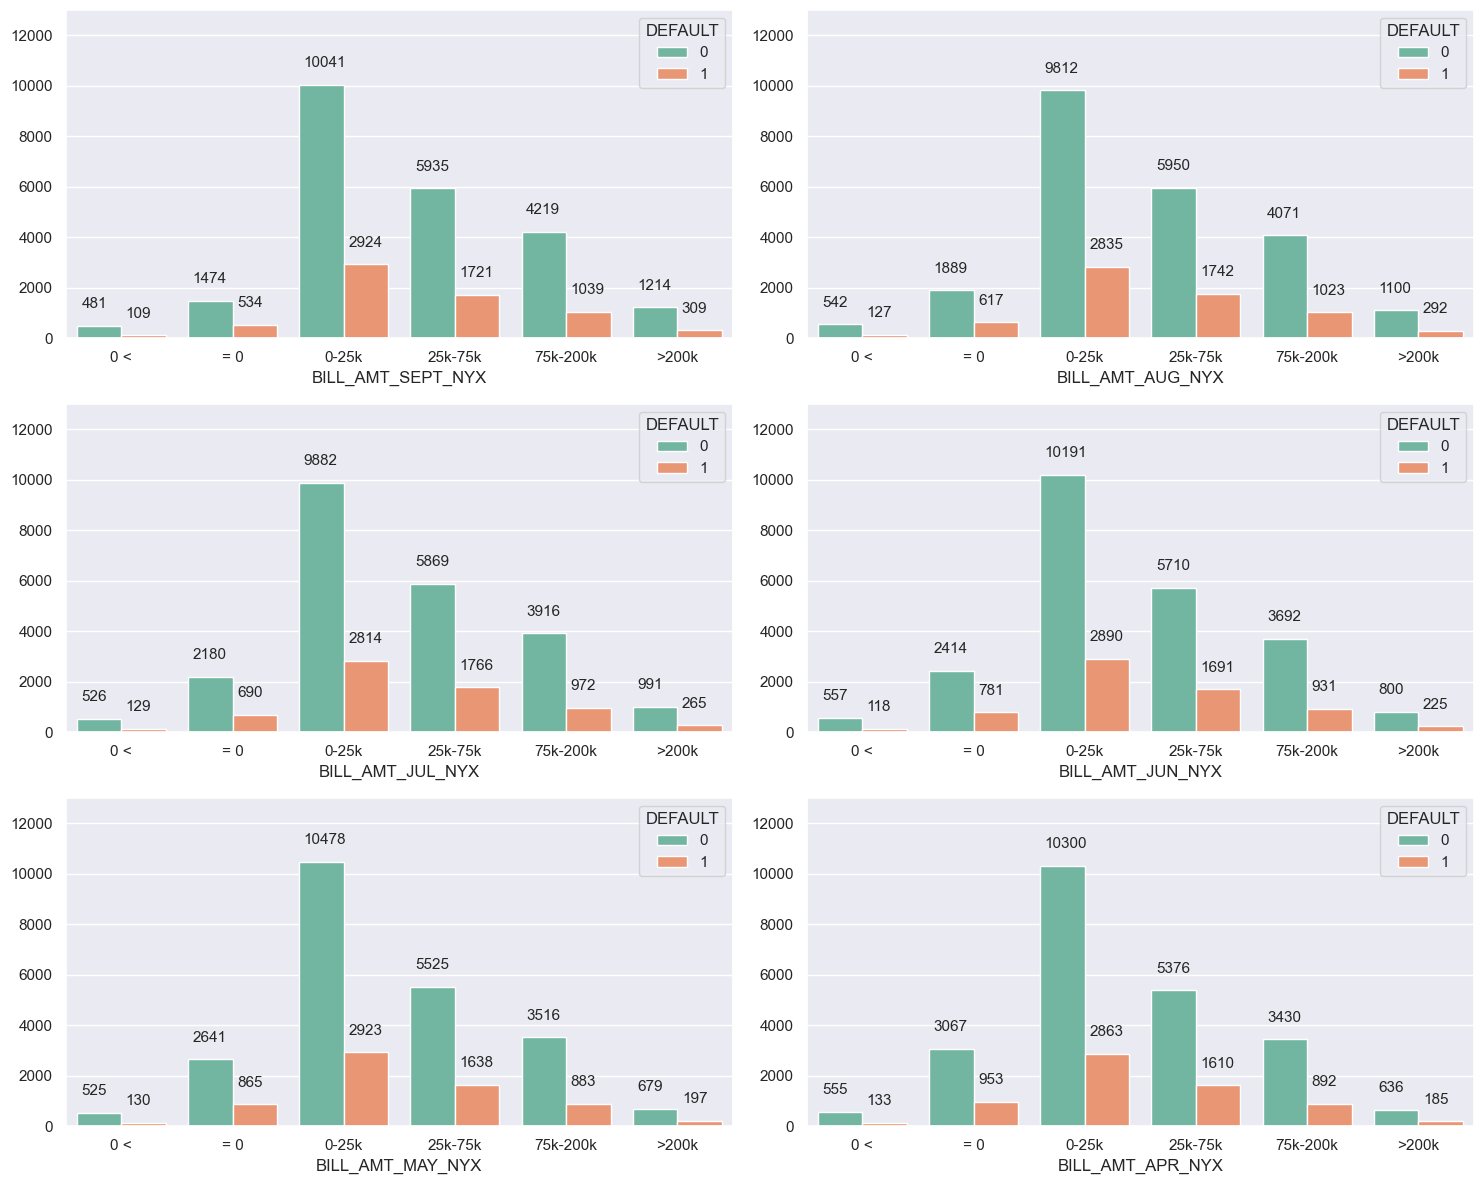

In [754]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1) 
for i,col in enumerate(CCD_BILL_AMT_NYX):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = CCD, x = col, hue="DEFAULT", palette = 'Set2')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

### Feature : Amount of of Previous Payment (PAY_AMT_X)

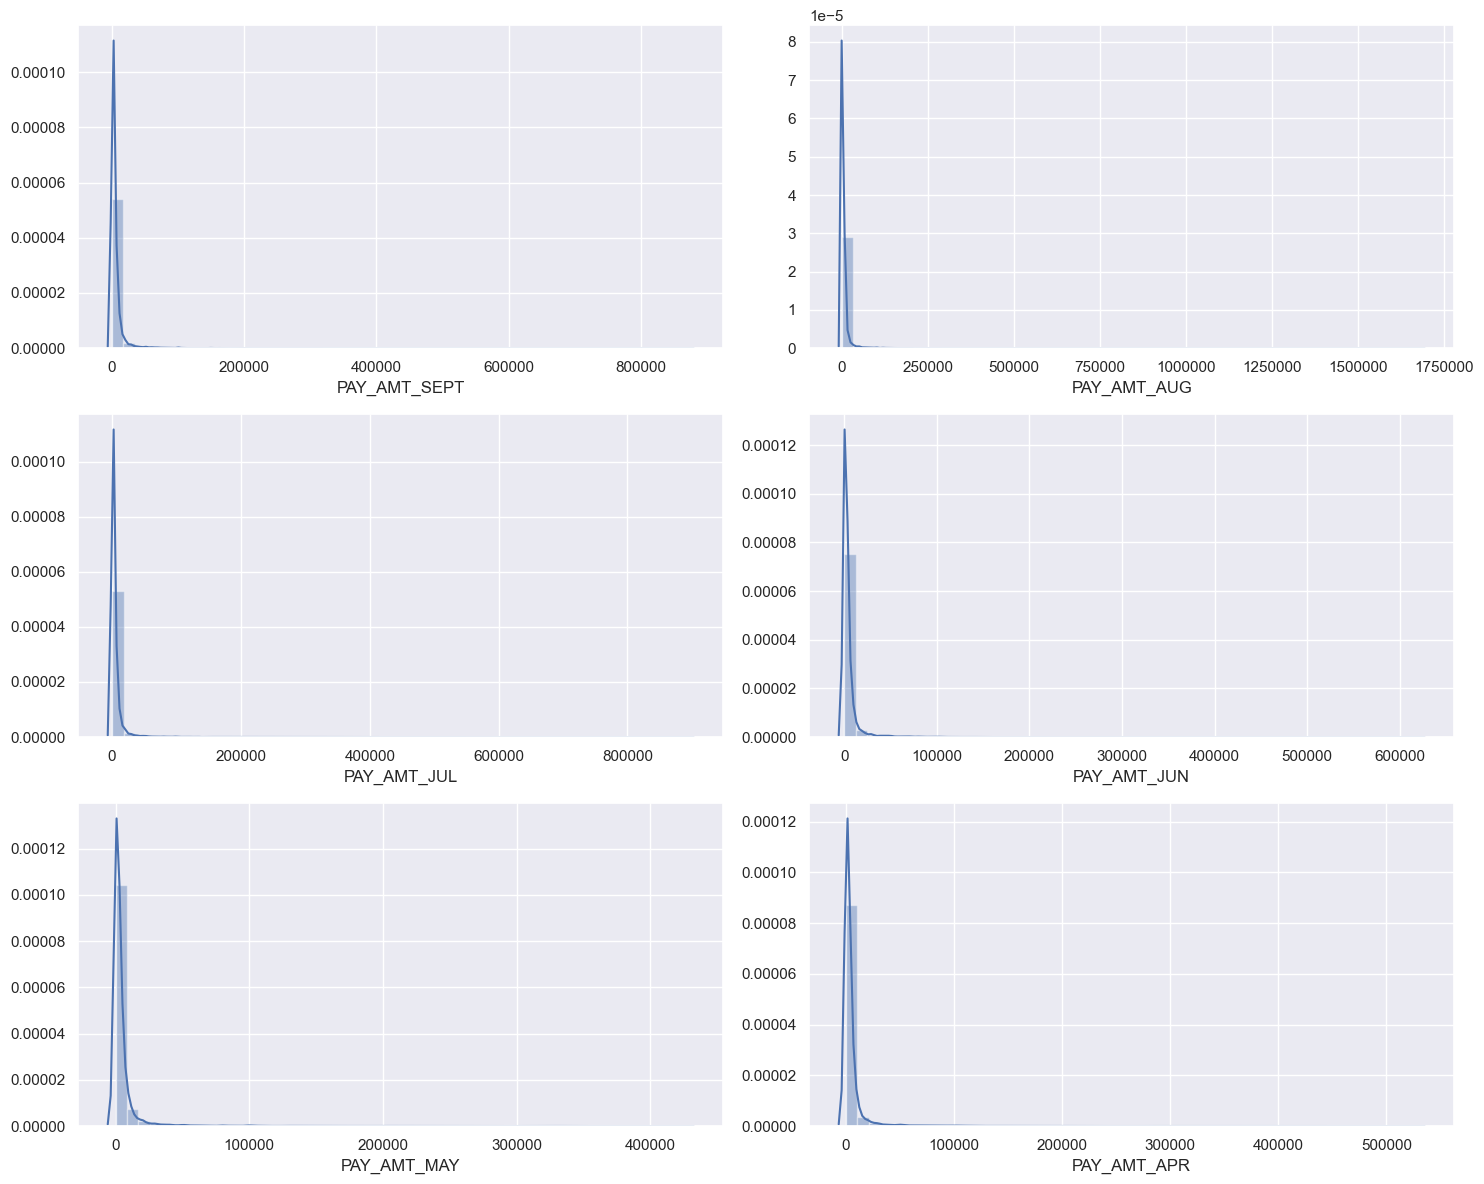

In [755]:
CCD_PAY_AMT_X = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
plt.figure(figsize=(15,12))

for i,col in enumerate(CCD_PAY_AMT_X):    
    plt.subplot(3,2,i + 1)
    sns.distplot(CCD.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

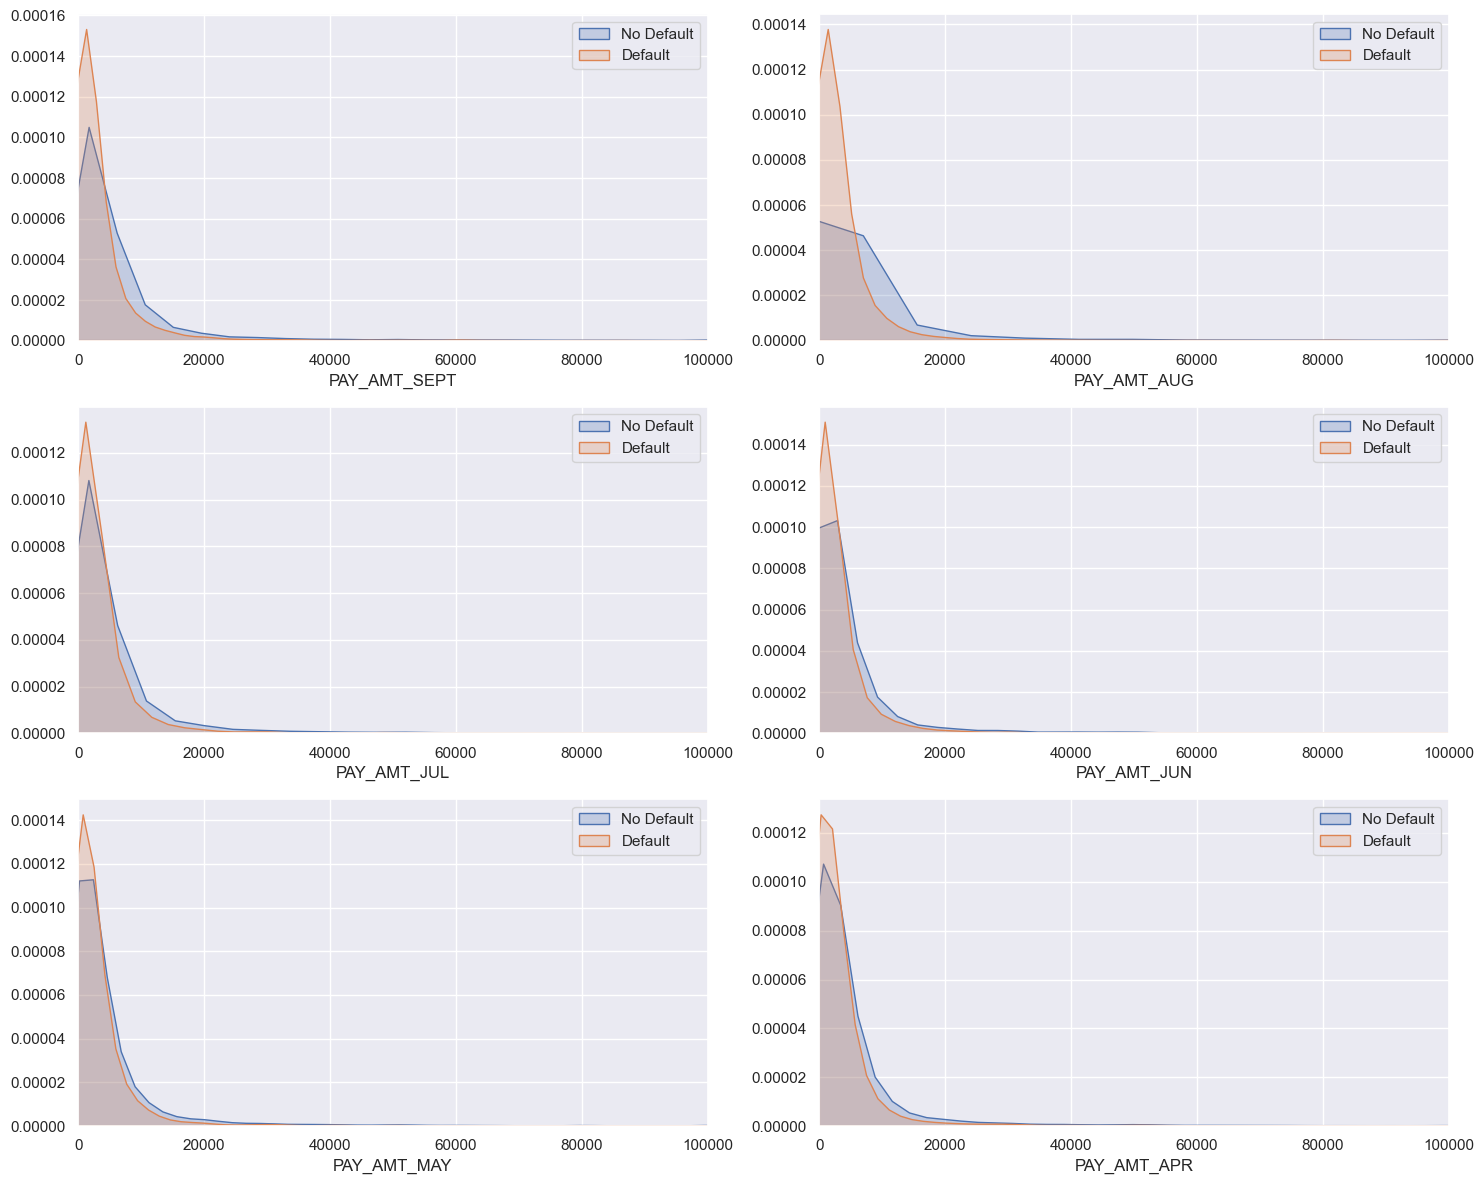

In [756]:
plt.figure(figsize=(15,12))

for i,col in enumerate(CCD_PAY_AMT_X):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(CCD.loc[(CCD['DEFAULT'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [757]:
CCD['PAY_AMT_SEPT_NYX'] = CCD['PAY_AMT_SEPT'].copy()
CCD['PAY_AMT_AUG_NYX'] = CCD['PAY_AMT_AUG'].copy()
CCD['PAY_AMT_JUL_NYX'] = CCD['PAY_AMT_JUL'].copy()
CCD['PAY_AMT_JUN_NYX'] = CCD['PAY_AMT_JUN'].copy()
CCD['PAY_AMT_MAY_NYX'] = CCD['PAY_AMT_MAY'].copy()
CCD['PAY_AMT_APR_NYX'] = CCD['PAY_AMT_APR'].copy()

In [758]:
CCD_PAY_AMT_NYX = ['PAY_AMT_SEPT_NYX', 'PAY_AMT_AUG_NYX', 'PAY_AMT_JUL_NYX', 'PAY_AMT_JUN_NYX', 'PAY_AMT_MAY_NYX', 'PAY_AMT_APR_NYX']

for i, col in enumerate (CCD_PAY_AMT_NYX):
    CCD[col] = pd.cut(CCD[CCD_PAY_AMT_NYX[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(CCD[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT_SEPT_NYX, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT_AUG_NYX, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT_JUL_NYX, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT_JUN_NYX, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT_MAY_NYX, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY

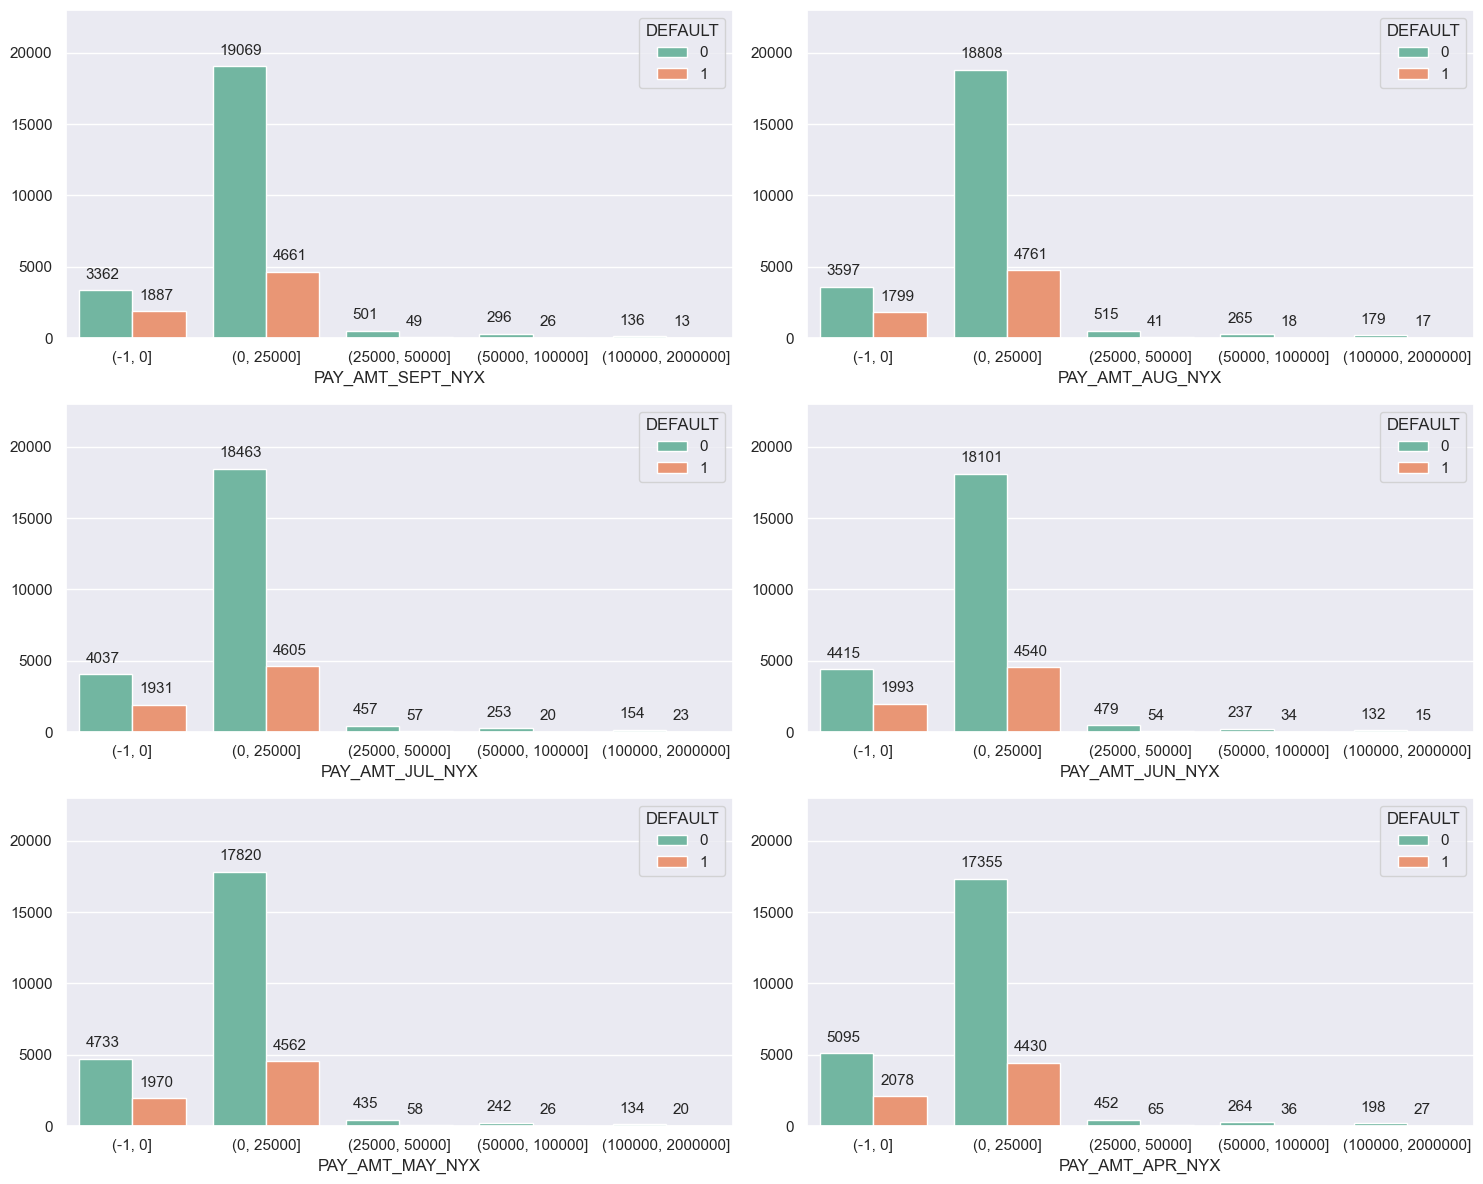

In [759]:
plt.figure(figsize=(15,12))

for i,col in enumerate(CCD_PAY_AMT_NYX):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = CCD, x = col, hue="DEFAULT", palette = 'Set2')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()

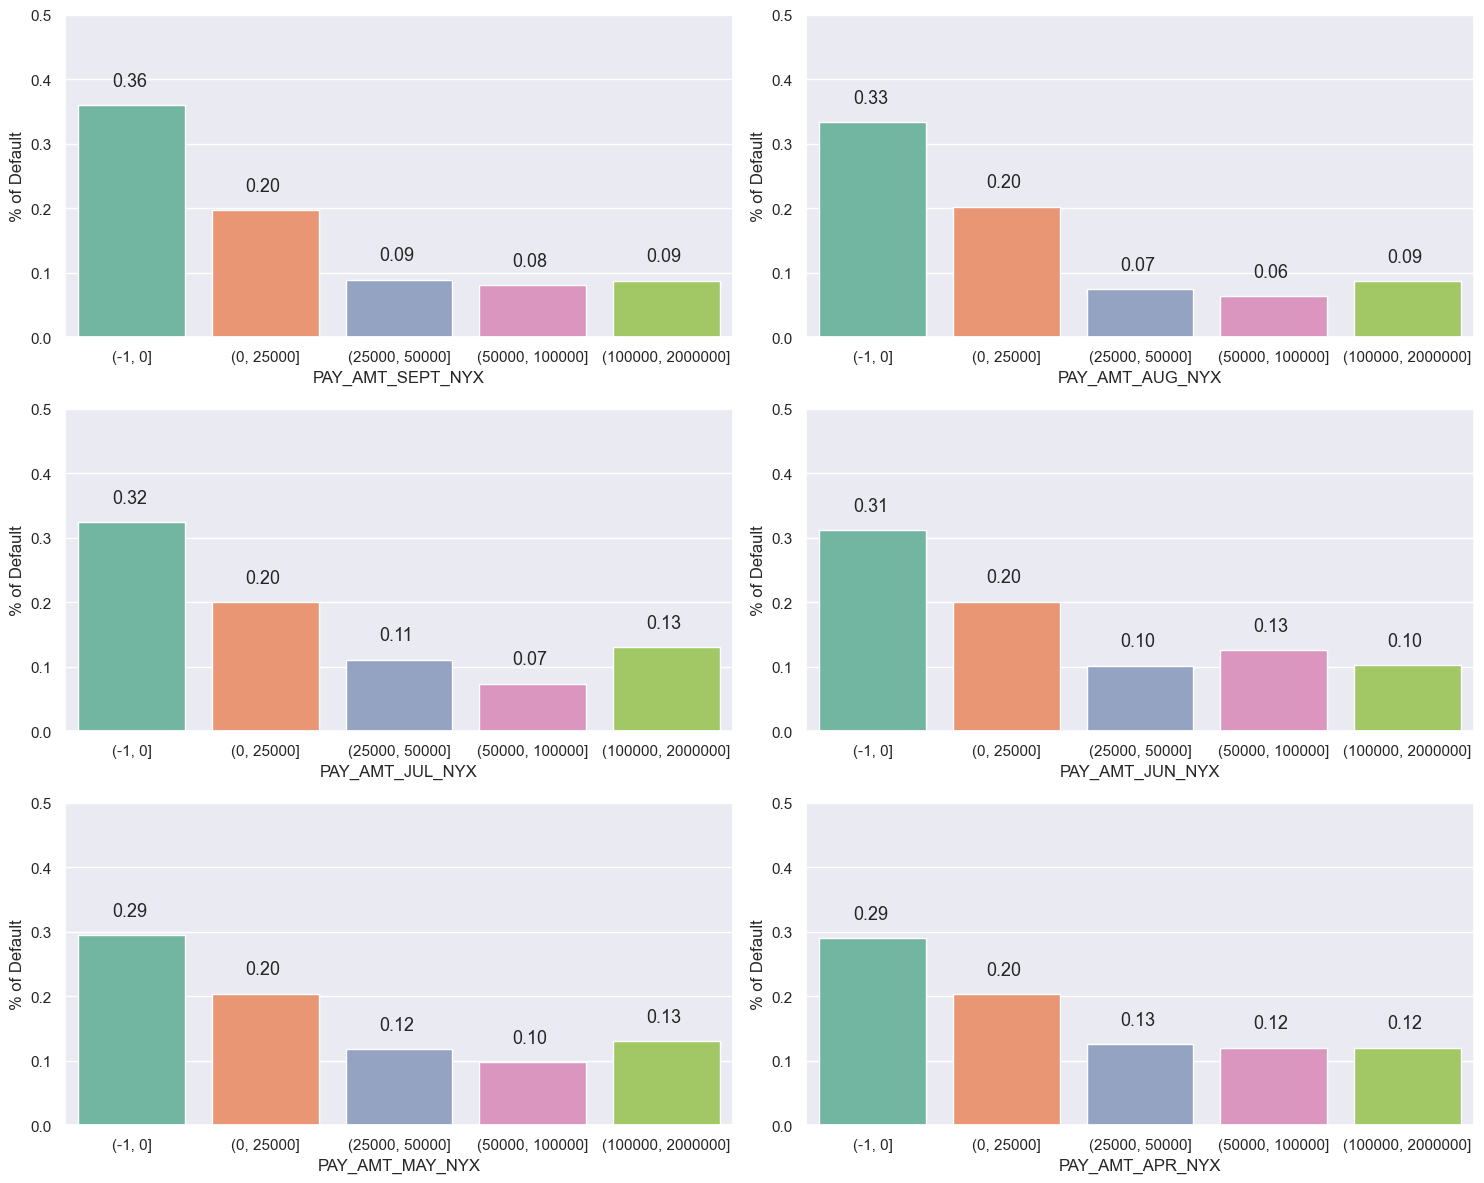

In [760]:
plt.figure(figsize=(15,12))

for i,col in enumerate(CCD_PAY_AMT_NYX):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "DEFAULT", data = CCD, palette = 'Set2', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

**Conclusion:**
There are no surprises in this group of features. There is a higher default rate among those who paid nothing in previous months and lower rates among those paid over 25k of NT dollars.

### CORRELATION (HEATMAP)

### PAY_BILL_X-->>DEFAULT(HEATMAP)

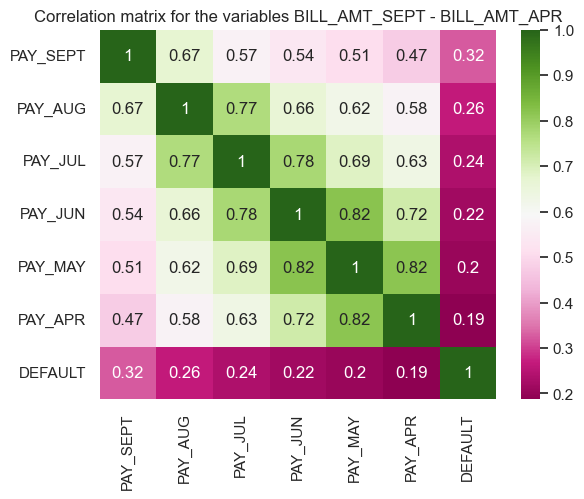

In [761]:
CCD_PX=['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR','DEFAULT']
cm = CCD[CCD_PX].corr()
plt.title('Correlation matrix for the variables BILL_AMT_SEPT - BILL_AMT_APR')
sns.heatmap(cm, annot=True, cmap = 'PiYG')
plt.show()

### BILL_AMT_X-->>DEFAULT(HEATMAP)

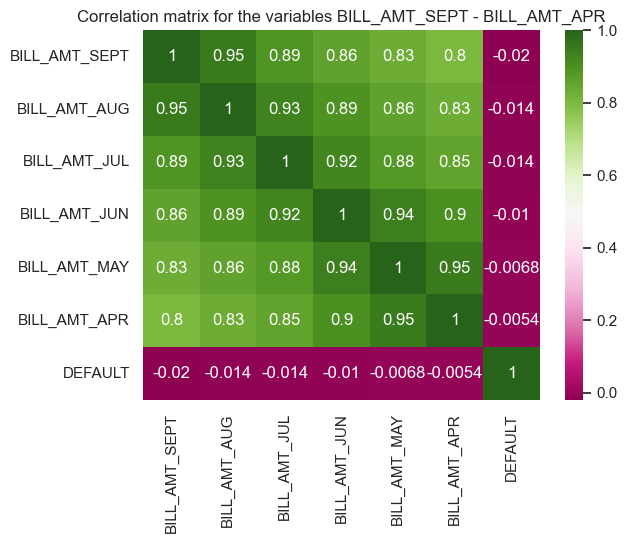

In [762]:
CCD_AMTX=['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR','DEFAULT']
cm = CCD[CCD_AMTX].corr()
plt.title('Correlation matrix for the variables BILL_AMT_SEPT - BILL_AMT_APR')
sns.heatmap(cm, annot=True, cmap = 'PiYG')
plt.show()

### PAY_AMT_X-->>DEFAULT(HEATMAP)

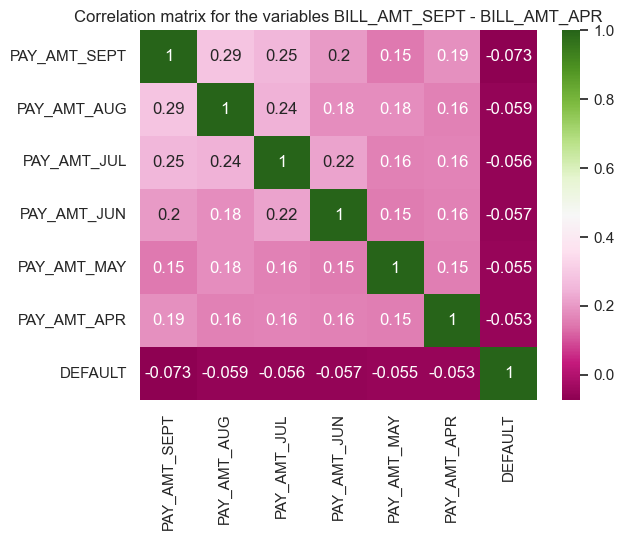

In [763]:
CCD_PMTX=['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR','DEFAULT']
cm = CCD[CCD_PMTX].corr()
plt.title('Correlation matrix for the variables BILL_AMT_SEPT - BILL_AMT_APR')
sns.heatmap(cm, annot=True, cmap = 'PiYG')
plt.show()

<AxesSubplot:title={'center':'Correlation Heatmap For The Entire Dataset'}>

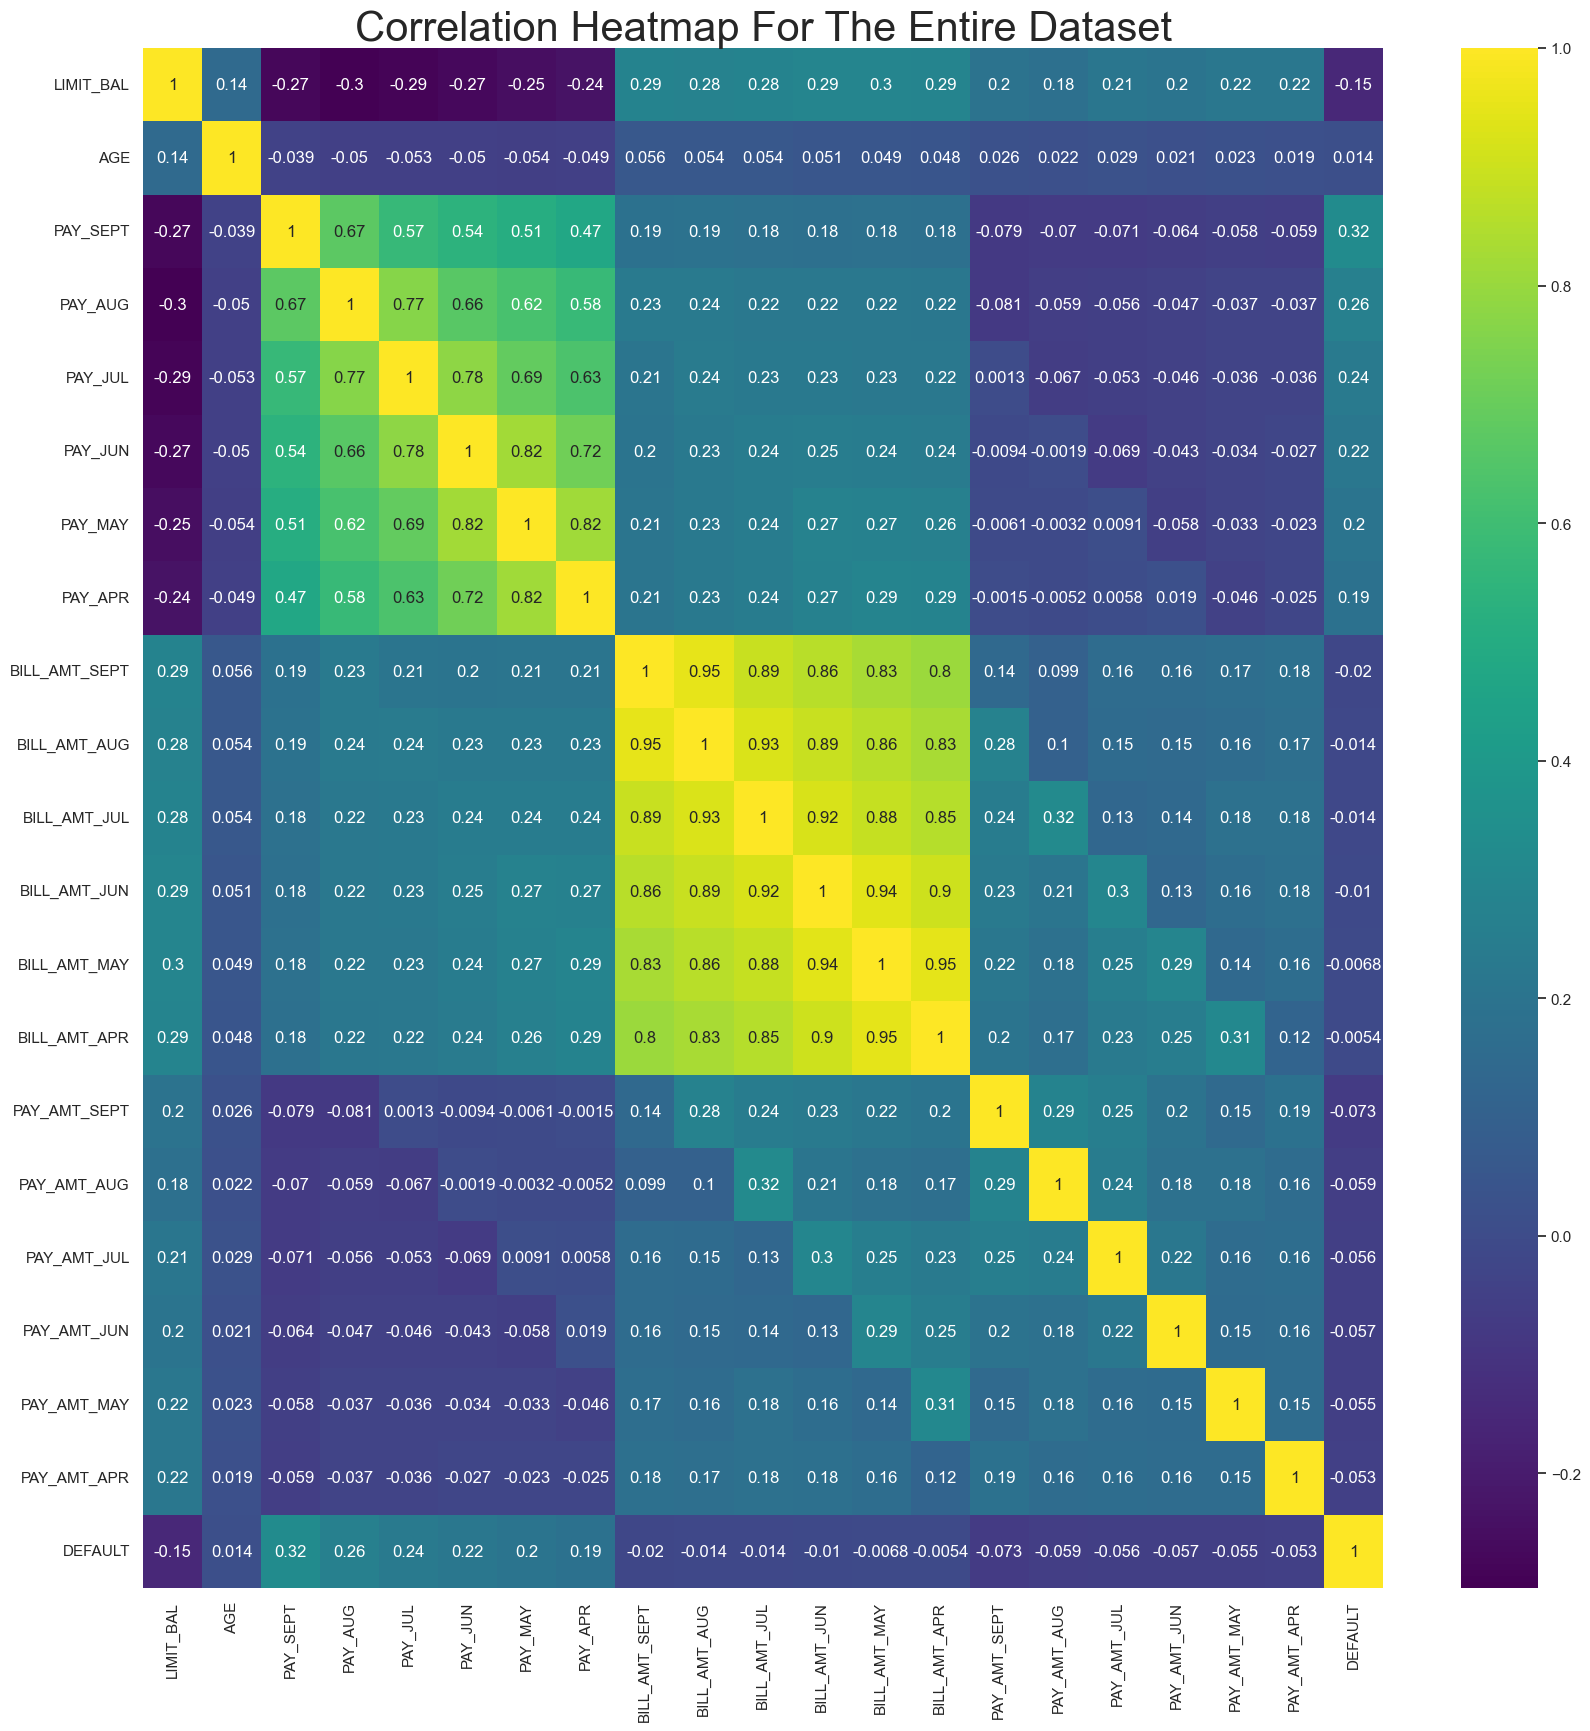

In [764]:
#correlation matrix
cm = CCD.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap For The Entire Dataset',fontsize=30)
sns.heatmap(cm, annot=True, cmap = 'viridis')

# 5. Data Preprocessing

In [765]:
# from sklearn.preprocessing import LabelEncoder 
# lbe = LabelEncoder()
# lbe.fit_transform(CCD["SEX"])
# CCD["SEX"] = lbe.fit_transform(CCD["SEX"])

# lbe.fit_transform(CCD["MARRIAGE"])
# CCD["MARRIAGE"] = lbe.fit_transform(CCD["MARRIAGE"])

# lbe.fit_transform(CCD["EDUCATION"])
# CCD["EDUCATION"] = lbe.fit_transform(CCD["EDUCATION"])

In [766]:
# CCD.info()

In [767]:
CCD=CCD.drop(['AgeNYX','BILL_AMT_SEPT_NYX','BILL_AMT_AUG_NYX','BILL_AMT_JUL_NYX','BILL_AMT_JUN_NYX','BILL_AMT_MAY_NYX','BILL_AMT_APR_NYX','PAY_AMT_SEPT_NYX','PAY_AMT_AUG_NYX','PAY_AMT_JUL_NYX','PAY_AMT_JUN_NYX','PAY_AMT_MAY_NYX','PAY_AMT_APR_NYX'], axis=1)

In [768]:
CCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      30000 non-null  float64
 1   SEX            30000 non-null  object 
 2   EDUCATION      30000 non-null  object 
 3   MARRIAGE       30000 non-null  object 
 4   AGE            30000 non-null  int64  
 5   PAY_SEPT       30000 non-null  int64  
 6   PAY_AUG        30000 non-null  int64  
 7   PAY_JUL        30000 non-null  int64  
 8   PAY_JUN        30000 non-null  int64  
 9   PAY_MAY        30000 non-null  int64  
 10  PAY_APR        30000 non-null  int64  
 11  BILL_AMT_SEPT  30000 non-null  float64
 12  BILL_AMT_AUG   30000 non-null  float64
 13  BILL_AMT_JUL   30000 non-null  float64
 14  BILL_AMT_JUN   30000 non-null  float64
 15  BILL_AMT_MAY   30000 non-null  float64
 16  BILL_AMT_APR   30000 non-null  float64
 17  PAY_AMT_SEPT   30000 non-null  float64
 18  PAY_AM

In [769]:
CCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      30000 non-null  float64
 1   SEX            30000 non-null  object 
 2   EDUCATION      30000 non-null  object 
 3   MARRIAGE       30000 non-null  object 
 4   AGE            30000 non-null  int64  
 5   PAY_SEPT       30000 non-null  int64  
 6   PAY_AUG        30000 non-null  int64  
 7   PAY_JUL        30000 non-null  int64  
 8   PAY_JUN        30000 non-null  int64  
 9   PAY_MAY        30000 non-null  int64  
 10  PAY_APR        30000 non-null  int64  
 11  BILL_AMT_SEPT  30000 non-null  float64
 12  BILL_AMT_AUG   30000 non-null  float64
 13  BILL_AMT_JUL   30000 non-null  float64
 14  BILL_AMT_JUN   30000 non-null  float64
 15  BILL_AMT_MAY   30000 non-null  float64
 16  BILL_AMT_APR   30000 non-null  float64
 17  PAY_AMT_SEPT   30000 non-null  float64
 18  PAY_AM

In [770]:
X =CCDM.drop('DEFAULT',axis=1)
y = CCDM['DEFAULT']

In [771]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [772]:
X.shape

(30000, 23)

In [773]:
y.shape

(30000,)

# 6 Model Training

In [774]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=21)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21000, 23), (21000,), (9000, 23), (9000,))

In [775]:
min_max_scaler = MinMaxScaler()
X_train_S= min_max_scaler.fit_transform(X_train)
X_test_S=min_max_scaler.transform(X_test)

In [776]:
## using SMOTE Technique for Imbalanced dataset
from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_train_sm,y_train_sm = sm.fit_resample(X_train_S,y_train)

print(f'before SMOTE sampling : {Counter(y_train)}')
print(f'aftere SMOTE sampling : {Counter(y_train_sm)}')

before SMOTE sampling : Counter({0: 16364, 1: 4636})
aftere SMOTE sampling : Counter({0: 16364, 1: 16364})


### Model Evalution

In [777]:
def model_evaluation(X_train,X_test,y_train,y_test,model):
    
    # model fitting
    model.fit(X_train_sm, y_train_sm)
    
    # Obtain the predicted values and probabilities from the model
    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)
    
    acc = metrics.accuracy_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    f1 = metrics.f1_score(y_test, y_test_pred)
    roc_auc =  metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])

    ## Plot confusion matrix
    plt.figure(figsize=(10,5))
        
    test_matrix = metrics.confusion_matrix(y_test, y_test_pred)    
    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    test_percent = [
        "{0:.2%}".format(value) for value in test_matrix.flatten() / np.sum(test_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, test_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.title(f"Confusion Matrix of {type(model).__name__}", fontsize=14)
    sns.heatmap(test_matrix, annot=labels, fmt="", cmap="PiYG")
    

    return acc,precision,recall,f1,roc_auc

## I. Logistic Regression

**Without Parameter Tuning**

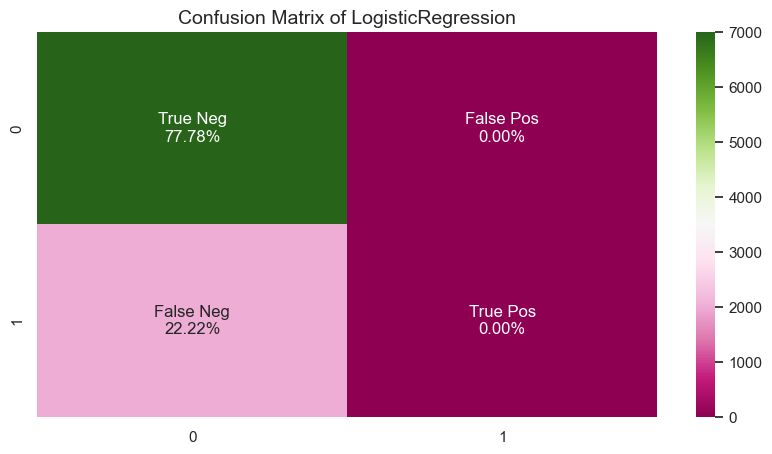

In [778]:
log_class = LogisticRegression()

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,log_class)

In [779]:
# Storing model results in a dataframe for comparison
model_results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"])

model = pd.DataFrame(
    [["Logistic Regression without tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

**With Parameter Tuning**

In [780]:

# Setting up a parameter grid for hyperparameter tuning 
## where hyperparameter like 'C' and 'penalty' using 10-splits of KFold

grid={'C' : [0.001,0.01,0.1,1,10,100,1000],
      "penalty" : ['l1','l2']}

cv = KFold(n_splits=10)

lr_clf=GridSearchCV(log_class,grid,n_jobs=-1,cv=cv,verbose=1,scoring='recall')

Fitting 10 folds for each of 14 candidates, totalling 140 fits


/Users/vaibhavjoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vaibhavjoshi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

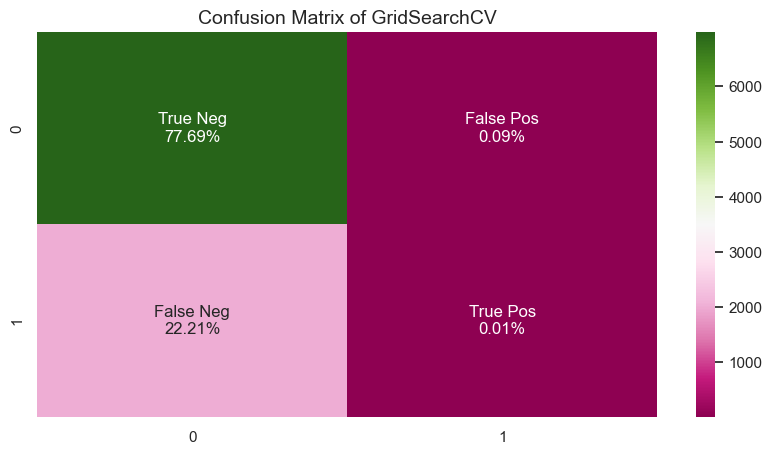

In [781]:
acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,lr_clf)

In [782]:
print(lr_clf.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [783]:
model = pd.DataFrame(
    [["Logistic Regression with tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

### II Random Forest

**Without Parameter Tuning**

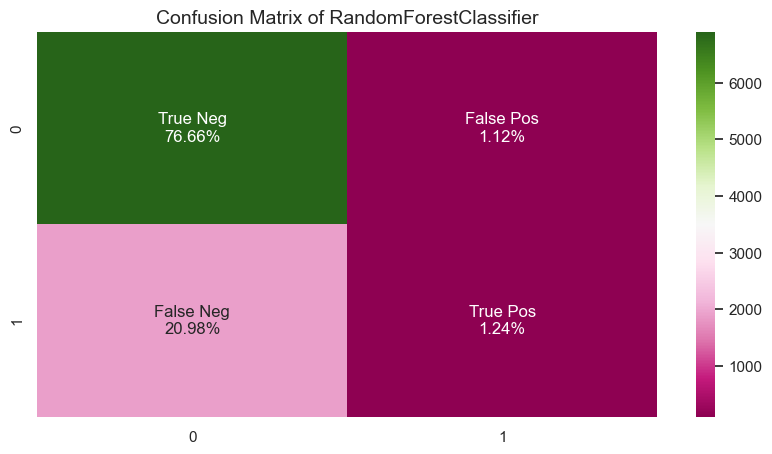

In [784]:
rf = RandomForestClassifier()

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,rf)

In [785]:
model = pd.DataFrame(
    [["Random Forest without tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

**With Parameter Tuning**

In [786]:
# Setting up a parameter grid for hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 25, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [787]:
rf_random = RandomizedSearchCV(rf, random_grid, n_iter = 10, cv = 5, scoring='recall', verbose=2, random_state=0, n_jobs = -1)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=  15.1s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=  15.3s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=  15.5s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=  15.6s
[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=  15.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20

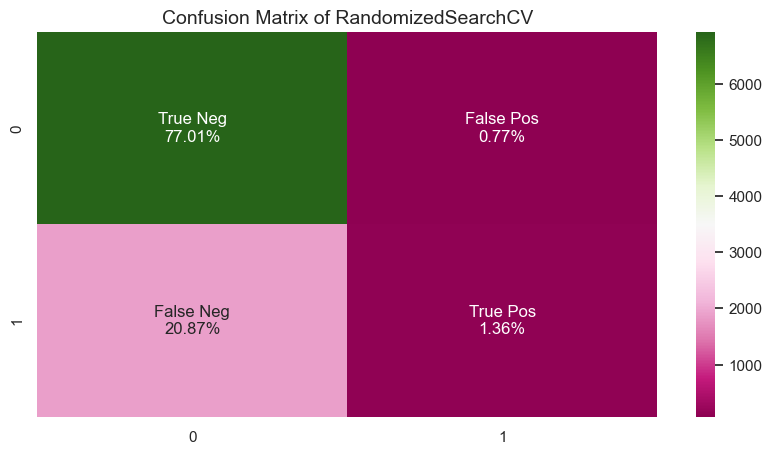

In [788]:
acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,rf_random)

In [789]:
# best parameters of Random Forest
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [790]:
model = pd.DataFrame(
    [["Random Forest with tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

### III. Decsion Tress

**Without Parameter Tuning**

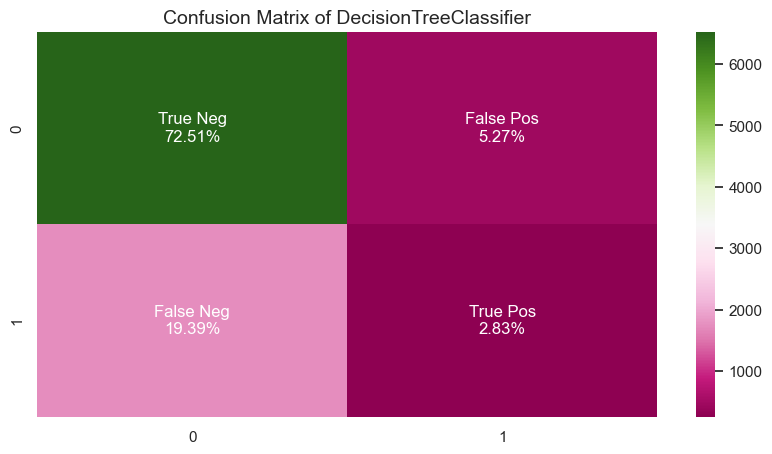

In [791]:
dtree = DecisionTreeClassifier()

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,dtree)

In [792]:
model = pd.DataFrame(
    [["Decision Tree without tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

**With Parameter Tuning**

In [793]:
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


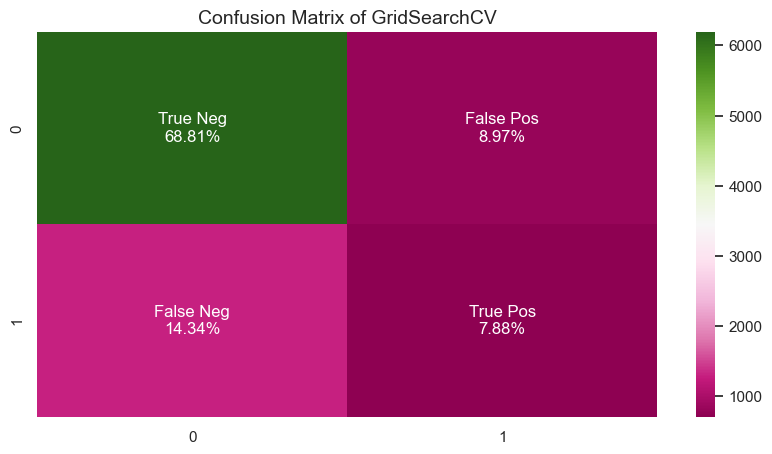

In [794]:
acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,GS)

In [795]:
# best parameters of Random Forest
print(GS.best_params_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [796]:
model = pd.DataFrame(
    [["Decision Tree with tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

### IV. XgBoost

**Without Parameter Tuning**

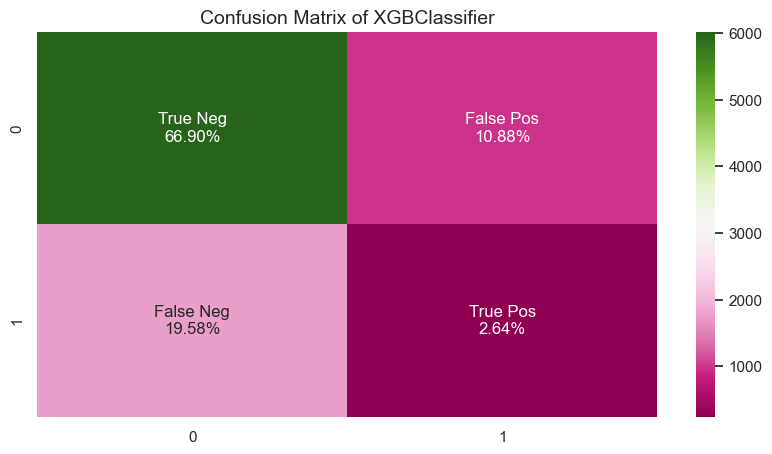

In [797]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=0)

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,xgb_model)

In [798]:
model = pd.DataFrame(
    [["xgboost without Tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

### Comparison of Model Performance

In [799]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC_ROC
0,Logistic Regression without tuning,77.777778,0.000000,0.0000,0.000000,0.500000
1,Logistic Regression with tuning,77.700000,0.111111,0.0005,0.000996,0.499679
2,Random Forest without tuning,77.900000,0.525822,0.0560,0.101220,0.702769
3,Random Forest with tuning,78.366667,0.638743,0.0610,0.111365,0.689314
4,Decision Tree without tuning,75.344444,0.349794,0.1275,0.186882,0.529893
5,Decision Tree with tuning,76.688889,0.467678,0.3545,0.403299,0.628039
6,xgboost without Tuning,69.544444,0.195563,0.1190,0.147964,0.441352


In [800]:
## LogReg without tuning
y_pred_proba_LG = log_class.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_LG)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_LG)

## LogReg with tuning
y_pred_proba_LGT = lr_clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_LGT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_LGT)

## RandomForest without tuning
y_pred_proba_RF = rf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

## RandomForest with tuning
y_pred_proba_RFT = rf_random.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_RFT)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_RFT)

## DecisionTree without tuning
y_pred_proba_DT = dtree.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

## DecisionTree with tuning
y_pred_proba_DTT = GS.predict_proba(X_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(y_test,  y_pred_proba_DTT)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba_DTT)

## xgboost without tuning
y_pred_proba_XG = xgb_model.predict_proba(X_test)[::,1]
fpr7, tpr7, _ = metrics.roc_curve(y_test,  y_pred_proba_XG)
auc7 = metrics.roc_auc_score(y_test, y_pred_proba_XG)


Text(0.5, 1.0, 'ROC')

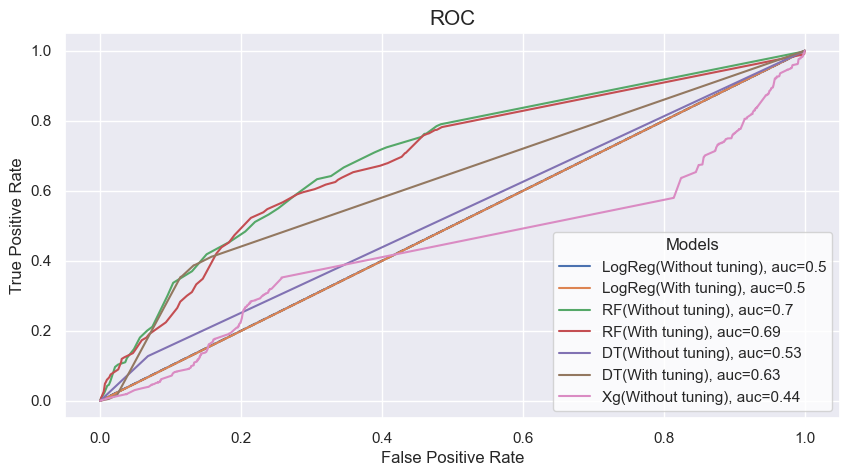

In [801]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr1,tpr1,label="LogReg(Without tuning), auc="+str(round(auc1,2)))

plt.plot(fpr2,tpr2,label="LogReg(With tuning), auc="+str(round(auc2,2)))

plt.plot(fpr3,tpr3,label="RF(Without tuning), auc="+str(round(auc3,2)))

plt.plot(fpr4,tpr4,label="RF(With tuning), auc="+str(round(auc4,2)))

plt.plot(fpr5,tpr5,label="DT(Without tuning), auc="+str(round(auc5,2)))

plt.plot(fpr6,tpr6,label="DT(With tuning), auc="+str(round(auc6,2)))

plt.plot(fpr7,tpr7,label="Xg(Without tuning), auc="+str(round(auc7,2)))


plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)

# 7. Model

In [802]:
model = rf_random

In [803]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))